# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [1]:
# Import warnings

import warnings
warnings.filterwarnings("ignore")


In [2]:
# Import the libraries you will be using for analysis

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [4]:
# Try loading one file


df = pd.read_parquet(r'C:\Users\deepa\OneDrive\Desktop\upgard_material\eda_ass\Datasets and Dictionary\trip_records\2023-1.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [5]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [6]:
# from google.colab import drive
# drive.mount('/content/drive')

In [7]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir(r'C:\Users\deepa\OneDrive\Desktop\upgard_material\eda_ass\Datasets and Dictionary\trip_records')

# List of all parquet files (optional: sort to ensure Jan-Dec order)
file_list = sorted([f for f in os.listdir() if f.endswith('.parquet')])

# Initialize final DataFrame to hold all sampled data
df = pd.DataFrame()

# Process each file
for file_name in file_list:
    try:
        print(f"Processing: {file_name}")
        file_path = os.path.join(os.getcwd(), file_name)

        # Read parquet file
        df_month = pd.read_parquet(file_path)

        # Convert datetime column to datetime object
        df_month['tpep_pickup_datetime'] = pd.to_datetime(df_month['tpep_pickup_datetime'])

        # Extract date and hour
        df_month['date'] = df_month['tpep_pickup_datetime'].dt.date
        df_month['hour'] = df_month['tpep_pickup_datetime'].dt.hour

        # Store samples for this month
        sampled_data = pd.DataFrame()

        # Iterate through each unique date
        for date in df_month['date'].unique():
            df_day = df_month[df_month['date'] == date]

            for hour in range(24):
                df_hour = df_day[df_day['hour'] == hour]

                # Sample 5% of records from this hour (if not empty)
                if not df_hour.empty:
                    sample = df_hour.sample(frac=0.05, random_state=42)
                    sampled_data = pd.concat([sampled_data, sample], ignore_index=True)
 # Append this month's sampled data to final DataFrame
        df = pd.concat([df, sampled_data], ignore_index=True)

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

# Show final shape
print(f"\nTotal sampled rows: {df.shape[0]}")


Processing: 2023-1.parquet
Processing: 2023-10.parquet
Processing: 2023-11.parquet
Processing: 2023-12.parquet
Processing: 2023-2.parquet
Processing: 2023-3.parquet
Processing: 2023-4.parquet
Processing: 2023-5.parquet
Processing: 2023-6.parquet
Processing: 2023-7.parquet
Processing: 2023-8.parquet
Processing: 2023-9.parquet
Processing: nyc_taxi_sampled.parquet

Total sampled rows: 1996077


After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [8]:
# Store the df in csv/parquet
# df.to_parquet('')

df.to_csv('nyc_taxi_sampled.csv', index=False)
df.to_parquet('nyc_taxi_sampled.parquet', index=False)

print("\n✅ Sampled data saved successfully.")


✅ Sampled data saved successfully.


## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [9]:
# Load the new data file

df = pd.read_parquet(r'C:\Users\deepa\OneDrive\Desktop\upgard_material\eda_ass\Datasets and Dictionary\trip_records\nyc_taxi_sampled.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1996077 entries, 0 to 1996076
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

In [10]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,date,hour,Airport_fee
0,2,2023-01-01 00:07:18,2023-01-01 00:23:15,1.0,7.74,1.0,N,138,256,2,...,0.5,0.00,0.0,1.0,41.15,0.0,1.25,2023-01-01,0,NaN
1,2,2023-01-01 00:16:41,2023-01-01 00:21:46,2.0,1.24,1.0,N,161,237,1,...,0.5,2.58,0.0,1.0,15.48,2.5,0.00,2023-01-01,0,NaN
2,2,2023-01-01 00:14:03,2023-01-01 00:24:36,3.0,1.44,1.0,N,237,141,2,...,0.5,0.00,0.0,1.0,16.40,2.5,0.00,2023-01-01,0,NaN
3,2,2023-01-01 00:24:30,2023-01-01 00:29:55,1.0,0.54,1.0,N,143,142,2,...,0.5,0.00,0.0,1.0,11.50,2.5,0.00,2023-01-01,0,NaN
4,2,2023-01-01 00:43:00,2023-01-01 01:01:00,NaN,19.24,NaN,None,66,107,0,...,0.5,5.93,0.0,1.0,35.57,NaN,NaN,2023-01-01,0,NaN


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1996077 entries, 0 to 1996076
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [12]:
# Show all columns, their data types, missing values, and number of unique values
summary = pd.DataFrame({
    'dtype': df.dtypes,
    'nulls': df.isnull().sum(),
    'unique_vals': df.nunique()
}).sort_values(by='nulls', ascending=False)

print(summary)

                                dtype    nulls  unique_vals
airport_fee                   float64  1839833            3
Airport_fee                   float64   224624            6
passenger_count               float64    68380           10
RatecodeID                    float64    68380            7
store_and_fwd_flag             object    68380            2
congestion_surcharge          float64    68380            4
tip_amount                    float64        0         3805
hour                            int32        0           24
date                           object        0          366
total_amount                  float64        0        14785
improvement_surcharge         float64        0            4
tolls_amount                  float64        0          713
VendorID                        int64        0            3
mta_tax                       float64        0            9
tpep_pickup_datetime   datetime64[ns]        0      1822529
fare_amount                   float64   

In [13]:
# Fix the index and drop any columns that are not needed

# Index fixing
df.reset_index(drop=True, inplace=True)

# dropping the column that are not needed in futher analysis
df.drop('store_and_fwd_flag', axis=1, inplace=True)

df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,date,hour,Airport_fee
0,2,2023-01-01 00:07:18,2023-01-01 00:23:15,1.0,7.74,1.0,138,256,2,32.40,...,0.5,0.00,0.0,1.0,41.15,0.0,1.25,2023-01-01,0,NaN
1,2,2023-01-01 00:16:41,2023-01-01 00:21:46,2.0,1.24,1.0,161,237,1,7.90,...,0.5,2.58,0.0,1.0,15.48,2.5,0.00,2023-01-01,0,NaN
2,2,2023-01-01 00:14:03,2023-01-01 00:24:36,3.0,1.44,1.0,237,141,2,11.40,...,0.5,0.00,0.0,1.0,16.40,2.5,0.00,2023-01-01,0,NaN
3,2,2023-01-01 00:24:30,2023-01-01 00:29:55,1.0,0.54,1.0,143,142,2,6.50,...,0.5,0.00,0.0,1.0,11.50,2.5,0.00,2023-01-01,0,NaN
4,2,2023-01-01 00:43:00,2023-01-01 01:01:00,NaN,19.24,NaN,66,107,0,25.64,...,0.5,5.93,0.0,1.0,35.57,NaN,NaN,2023-01-01,0,NaN


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1996077 entries, 0 to 1996076
Data columns (total 21 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   PULocationID           int64         
 7   DOLocationID           int64         
 8   payment_type           int64         
 9   fare_amount            float64       
 10  extra                  float64       
 11  mta_tax                float64       
 12  tip_amount             float64       
 13  tolls_amount           float64       
 14  improvement_surcharge  float64       
 15  total_amount           float64       
 16  congestion_surcharge   float64       
 17  airport_fee            float64       
 18  date                  

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [15]:
# Combine the two airport fee columns

df['airport_fee'] = df['airport_fee'].combine_first(df['Airport_fee'])

# After combining , droppiing 1 airport_fee column 
df.drop('Airport_fee', axis=1, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1996077 entries, 0 to 1996076
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   PULocationID           int64         
 7   DOLocationID           int64         
 8   payment_type           int64         
 9   fare_amount            float64       
 10  extra                  float64       
 11  mta_tax                float64       
 12  tip_amount             float64       
 13  tolls_amount           float64       
 14  improvement_surcharge  float64       
 15  total_amount           float64       
 16  congestion_surcharge   float64       
 17  airport_fee            float64       
 18  date                  

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [16]:
# check where values of fare amount are negative

(df['fare_amount'] < 0).sum()

0

Did you notice something different in the `RatecodeID` column for above records?

In [17]:
# Analyse RatecodeID for the negative fare amounts

negative_fares = df[df['fare_amount'] < 0]

ratecode_analysis = negative_fares.groupby('RatecodeID').size()

print("RateCodeID distribution for negative fare amounts:", ratecode_analysis)

df['RatecodeID'].value_counts()

RateCodeID distribution for negative fare amounts: Series([], dtype: int64)


RatecodeID
1.0     1819945
2.0       75537
99.0      11007
5.0       10849
3.0        6454
4.0        3902
6.0           3
Name: count, dtype: int64

In [17]:
# Find which columns have negative values

negative_columns = [col for col in df.select_dtypes(include='number').columns if (df[col] < 0).any()]
print("Coloumns which have negative values are : ", negative_columns)

# Count how many negative values each numeric column has
negative_counts = (df[df.select_dtypes(include='number').columns] < 0).sum()

# Filter and display only the columns that have negative values
print("Count of negative values per column:", negative_counts[negative_counts > 0])

Coloumns which have negative values are :  ['extra', 'mta_tax', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee']
Count of negative values per column: extra                     3
mta_tax                  74
improvement_surcharge    79
total_amount             79
congestion_surcharge     56
airport_fee              15
dtype: int64


In [18]:
# fix these negative values

# Set negative values to 0 for extra
df.loc[df['extra'] < 0, 'extra'] = 0

# Set negative values to 0.5 for mta_tax
df.loc[df['mta_tax'] < 0, 'mta_tax'] = 0.5

# For other columns, replace negatives with the median of non-negative values
for column in ['improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee']:
    median_value = df.loc[df[column] >= 0, column].median()
    df.loc[df[column] < 0, column] = median_value

df.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,hour
count,1.996077e+06,1996077,1996077,1.927697e+06,1.996077e+06,1.927697e+06,1.996077e+06,1.996077e+06,1.996077e+06,1.996077e+06,1.996077e+06,1.996077e+06,1.996077e+06,1.996077e+06,1.996077e+06,1.996077e+06,1.927697e+06,1.927697e+06,1.996077e+06
mean,1.733091e+00,2023-07-02 20:01:33.013654016,2023-07-02 20:18:59.015912192,1.369223e+00,3.860656e+00,1.634046e+00,1.652876e+02,1.640619e+02,1.163790e+00,1.991496e+01,1.587761e+00,4.953096e-01,3.546390e+00,5.972019e-01,9.990478e-01,2.897851e+01,2.307772e+00,1.429360e-01,1.426458e+01
min,1.000000e+00,2022-12-31 23:51:30,2022-12-31 23:56:06,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,2023-04-02 16:11:46,2023-04-02 16:30:22,1.000000e+00,1.050000e+00,1.000000e+00,1.320000e+02,1.140000e+02,1.000000e+00,9.300000e+00,0.000000e+00,5.000000e-01,1.000000e+00,0.000000e+00,1.000000e+00,1.596000e+01,2.500000e+00,0.000000e+00,1.100000e+01
50%,2.000000e+00,2023-06-27 15:47:29,2023-06-27 16:05:23,1.000000e+00,1.790000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,1.350000e+01,1.000000e+00,5.000000e-01,2.850000e+00,0.000000e+00,1.000000e+00,2.100000e+01,2.500000e+00,0.000000e+00,1.500000e+01
75%,2.000000e+00,2023-10-06 19:39:57,2023-10-06 19:55:13,1.000000e+00,3.400000e+00,1.000000e+00,2.340000e+02,2.340000e+02,1.000000e+00,2.190000e+01,2.500000e+00,5.000000e-01,4.420000e+00,0.000000e+00,1.000000e+00,3.094000e+01,2.500000e+00,0.000000e+00,1.900000e+01
max,6.000000e+00,2023-12-31 23:57:51,2024-01-01 20:50:55,9.000000e+00,1.263605e+05,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,1.431635e+05,2.080000e+01,4.000000e+00,2.230800e+02,1.430000e+02,1.000000e+00,1.431675e+05,2.500000e+00,1.750000e+00,2.300000e+01
std,4.477028e-01,NaN,NaN,8.926300e-01,1.281454e+02,7.388978e+00,6.399840e+01,6.980435e+01,5.082399e-01,1.029504e+02,1.829217e+00,4.849072e-02,4.053963e+00,2.189708e+00,2.843222e-02,1.038516e+02,6.660463e-01,4.648817e-01,5.807630e+00


### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [19]:
# Find the proportion of missing values in each column

missing_cols = df.isna().mean()
print(missing_cols)

VendorID                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          0.034257
trip_distance            0.000000
RatecodeID               0.034257
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
congestion_surcharge     0.034257
airport_fee              0.034257
date                     0.000000
hour                     0.000000
dtype: float64


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [20]:
# Display the rows with null values
rows_with_nulls = df[df.isnull().any(axis=1)]

# Impute NaN values in 'passenger_count'
median_val = df['passenger_count'].median()

#Filling NaN values in 'passenger_count' with its median
df['passenger_count'].fillna(median_val, inplace=True)

print(f"🧾 Total rows with null values: {rows_with_nulls.shape[0]}")
display(rows_with_nulls.head())  # Preview the first few rows

print(f"\nRemaining null values after imputation: {df['passenger_count'].isnull().sum()}")

🧾 Total rows with null values: 68380


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,date,hour
4,2,2023-01-01 00:43:00,2023-01-01 01:01:00,NaN,19.24,NaN,66,107,0,25.64,0.0,0.5,5.93,0.00,1.0,35.57,NaN,NaN,2023-01-01,0
15,2,2023-01-01 00:41:50,2023-01-01 01:14:50,NaN,10.77,NaN,151,106,0,45.38,0.0,0.5,11.19,6.55,1.0,67.12,NaN,NaN,2023-01-01,0
42,2,2023-01-01 00:37:21,2023-01-01 00:54:18,NaN,4.52,NaN,114,262,0,25.38,0.0,0.5,0.00,0.00,1.0,29.38,NaN,NaN,2023-01-01,0
43,2,2023-01-01 00:44:03,2023-01-01 01:13:49,NaN,9.19,NaN,239,256,0,40.00,0.0,0.5,2.20,0.00,1.0,46.20,NaN,NaN,2023-01-01,0
46,2,2023-01-01 00:50:55,2023-01-01 01:19:06,NaN,2.74,NaN,90,48,0,18.48,0.0,0.5,3.37,0.00,1.0,25.85,NaN,NaN,2023-01-01,0



Remaining null values after imputation: 0


Did you find zeroes in passenger_count? Handle these.

In [21]:
# Yes,it's clear that passenger_count includes 0 values, which typically doesn't make sense in the context of a taxi ride.
# so i replace it with median

median_val = df['passenger_count'].median()
df['passenger_count'] = df['passenger_count'].replace(0, median_val)
df[['passenger_count']].describe()

,passenger_count
count,1.996077e+06
mean,1.372197e+00
std,8.642891e-01
min,1.000000e+00
25%,1.000000e+00
50%,1.000000e+00
75%,1.000000e+00
max,9.000000e+00


**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [22]:
# Fix missing values in 'RatecodeID'

df['RatecodeID'] = df['RatecodeID'].fillna(df['RatecodeID'].mode()[0])

print(f"Mode value used: {df['RatecodeID'].mode()[0]}")
print(f"Missing values after filling: {df['RatecodeID'].isnull().sum()}")

Mode value used: 1.0
Missing values after filling: 0


**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [23]:
# handle null values in congestion_surcharge


median_val = df['congestion_surcharge'].median()
df['congestion_surcharge'].fillna(median_val, inplace = True)

missing_count = df['congestion_surcharge'].isnull().sum()
print(f"Missing values in Congestion_Surcharge: {missing_count}")


Missing values in Congestion_Surcharge: 0


Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

Ans -> Yes airport_fee has 68332 null values.

In [24]:
# Handle any remaining missing values

median_val = df['airport_fee'].median()
df['airport_fee'].fillna(median_val, inplace = True)

df.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
airport_fee              0
date                     0
hour                     0
dtype: int64

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [25]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns

df.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,hour
count,1.996077e+06,1996077,1996077,1.996077e+06,1.996077e+06,1.996077e+06,1.996077e+06,1.996077e+06,1.996077e+06,1.996077e+06,1.996077e+06,1.996077e+06,1.996077e+06,1.996077e+06,1.996077e+06,1.996077e+06,1.996077e+06,1.996077e+06,1.996077e+06
mean,1.733091e+00,2023-07-02 20:01:33.013654016,2023-07-02 20:18:59.015912192,1.372197e+00,3.860656e+00,1.612325e+00,1.652876e+02,1.640619e+02,1.163790e+00,1.991496e+01,1.587761e+00,4.953096e-01,3.546390e+00,5.972019e-01,9.990478e-01,2.897851e+01,2.314357e+00,1.380394e-01,1.426458e+01
min,1.000000e+00,2022-12-31 23:51:30,2022-12-31 23:56:06,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,2023-04-02 16:11:46,2023-04-02 16:30:22,1.000000e+00,1.050000e+00,1.000000e+00,1.320000e+02,1.140000e+02,1.000000e+00,9.300000e+00,0.000000e+00,5.000000e-01,1.000000e+00,0.000000e+00,1.000000e+00,1.596000e+01,2.500000e+00,0.000000e+00,1.100000e+01
50%,2.000000e+00,2023-06-27 15:47:29,2023-06-27 16:05:23,1.000000e+00,1.790000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,1.350000e+01,1.000000e+00,5.000000e-01,2.850000e+00,0.000000e+00,1.000000e+00,2.100000e+01,2.500000e+00,0.000000e+00,1.500000e+01
75%,2.000000e+00,2023-10-06 19:39:57,2023-10-06 19:55:13,1.000000e+00,3.400000e+00,1.000000e+00,2.340000e+02,2.340000e+02,1.000000e+00,2.190000e+01,2.500000e+00,5.000000e-01,4.420000e+00,0.000000e+00,1.000000e+00,3.094000e+01,2.500000e+00,0.000000e+00,1.900000e+01
max,6.000000e+00,2023-12-31 23:57:51,2024-01-01 20:50:55,9.000000e+00,1.263605e+05,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,1.431635e+05,2.080000e+01,4.000000e+00,2.230800e+02,1.430000e+02,1.000000e+00,1.431675e+05,2.500000e+00,1.750000e+00,2.300000e+01
std,4.477028e-01,NaN,NaN,8.642891e-01,1.281454e+02,7.262227e+00,6.399840e+01,6.980435e+01,5.082399e-01,1.029504e+02,1.829217e+00,4.849072e-02,4.053963e+00,2.189708e+00,2.843222e-02,1.038516e+02,6.554717e-01,4.575887e-01,5.807630e+00


In [26]:
df.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
airport_fee              0
date                     0
hour                     0
dtype: int64

In [27]:
# finding outliers of trip distance 

Q1 = df['trip_distance'].quantile(0.25)
Q3 = df['trip_distance'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_trip_distance = df[(df['trip_distance'] < lower_bound) | (df['trip_distance'] > upper_bound)]

print(f" Potential outliers in Trip_distance: {outliers_trip_distance.shape[0]}")

 Potential outliers in Trip_distance: 262425


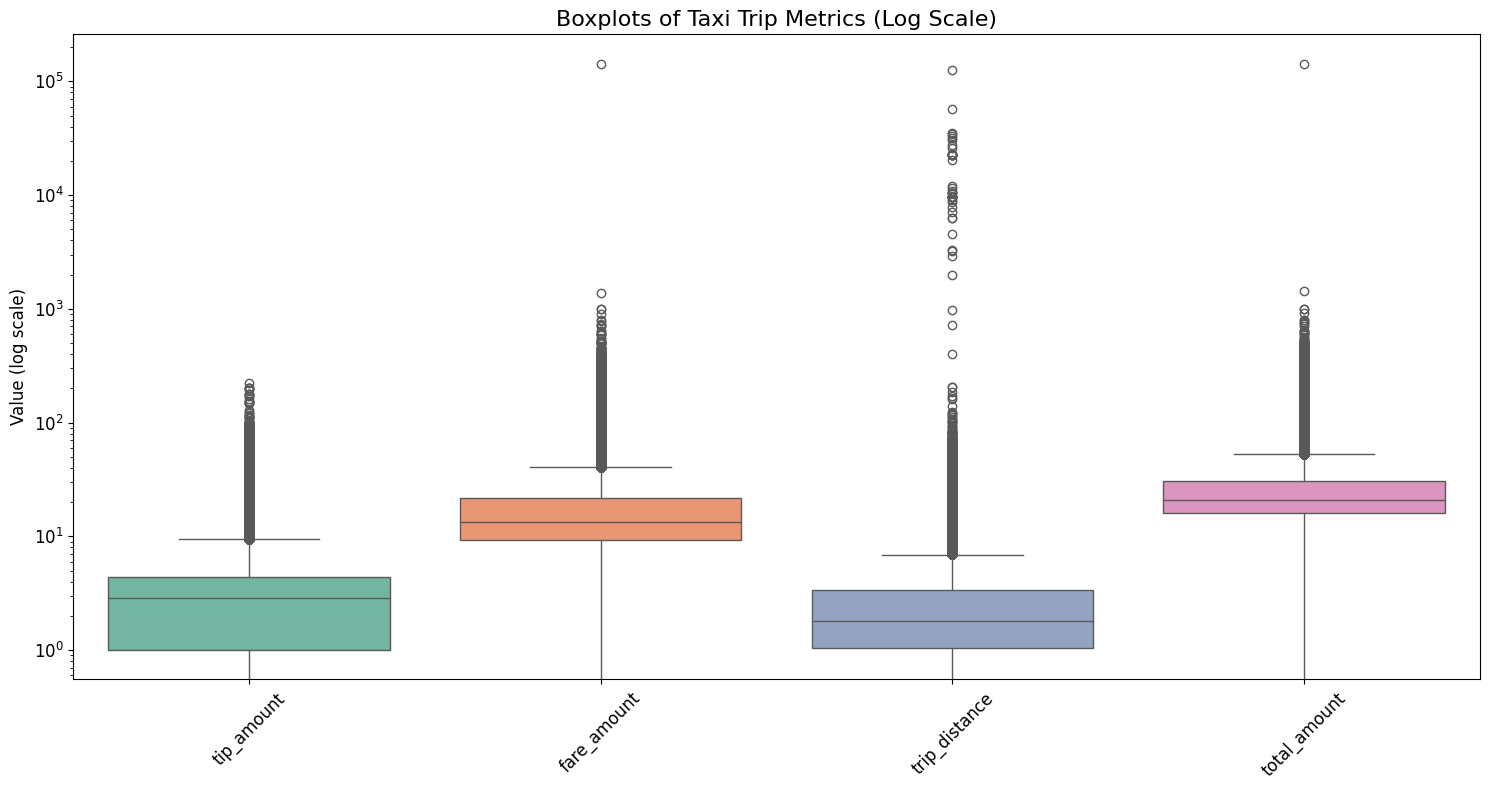

In [28]:
# plot all 4 diagram in one diagram to see the outliers

# Set up the figure
plt.figure(figsize=(15, 8))

# Select the columns to plot
columns = ['tip_amount', 'fare_amount', 'trip_distance', 'total_amount']

# Create boxplots
sns.boxplot(data=df[columns], palette="Set2")

# Add logarithmic scale to handle extreme outliers
plt.yscale('log')

# Add titles and labels
plt.title('Boxplots of Taxi Trip Metrics (Log Scale)', fontsize=16)
plt.ylabel('Value (log scale)', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Rotate x-axis labels
plt.xticks(rotation=45)
plt.grid(False)

# Show plot
plt.tight_layout()
plt.show()

In [29]:
# Check for potential out of place values in various columns

# Columns related to monetary values
monetary_cols = ['fare_amount', 'tip_amount', 'total_amount', 
                 'improvement_surcharge', 'congestion_surcharge', 'airport_fee']

# Check for negative values
negative_values = df[monetary_cols].lt(0).sum()

print("Negative values in monetary columns:")
print(negative_values)

Negative values in monetary columns:
fare_amount              0
tip_amount               0
total_amount             0
improvement_surcharge    0
congestion_surcharge     0
airport_fee              0
dtype: int64


In [30]:
#Check for Unrealistically High Values

# Unrealistically high trip distance (e.g., > 100 miles is rare but possible)
high_trip_distance = df[df['trip_distance'] > 100]
print(f" Unrealistically high trip distances (> 100 miles): {high_trip_distance.shape[0]}")

# Unrealistically high fare amount (e.g., > 500)
high_fare_amount = df[df['fare_amount'] > 500]
print(f" Unrealistically high fare amounts (> $500): {high_fare_amount.shape[0]}")

# Unrealistically high passenger count (e.g., > 10 passengers)
high_passenger_count = df[df['passenger_count'] > 10]
print(f" Unrealistically high passenger counts (> 10): {high_passenger_count.shape[0]}")

 Unrealistically high trip distances (> 100 miles): 66
 Unrealistically high fare amounts (> $500): 23
 Unrealistically high passenger counts (> 10): 0


In [31]:
#Check for Inconsistent Values in Categorical Columns
valid_ratecodes = [1, 2, 3, 4, 5, 6]
invalid_ratecodes = df[~df['RatecodeID'].isin(valid_ratecodes)]
print(f" Inconsistent RatecodeID values: {invalid_ratecodes.shape[0]}")

valid_payment_types = [1, 2, 3, 4]
invalid_payment_types = df[~df['payment_type'].isin(valid_payment_types)]
print(f" Inconsistent Payment_type values: {invalid_payment_types.shape[0]}")

invalid_datetime = df[df['tpep_pickup_datetime'] > df['tpep_dropoff_datetime']]
print(f" Invalid datetime values (pickup > dropoff): {invalid_datetime.shape[0]}")


 Inconsistent RatecodeID values: 11007
 Inconsistent Payment_type values: 68380
 Invalid datetime values (pickup > dropoff): 131


**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [32]:
# remove passenger_count > 6

df = df[df['passenger_count'] <= 6]
df[df['passenger_count'] > 6].shape[0]


0

In [33]:
# Continue with outlier handling

# Entries where trip_distance is nearly 0 and fare_amount is more than 300, remove them
df = df[~((df['trip_distance'] <= 0.1) & (df['fare_amount'] > 300))]

# Entries where trip_distance and fare_amount are 0 but the pickup and dropoff zones are different, Remove them
df = df[~((df['trip_distance'] == 0) & (df['fare_amount'] == 0) & (df['PULocationID'] != df['DOLocationID']))]

# Consider Entries where trip_distance is less than and equal to 250 miles.
df = df[df['trip_distance'] <= 250]

# Consider Entries where payment_type is greater than 0
df = df[df['payment_type'] > 0]

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1927556 entries, 0 to 1996076
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   PULocationID           int64         
 7   DOLocationID           int64         
 8   payment_type           int64         
 9   fare_amount            float64       
 10  extra                  float64       
 11  mta_tax                float64       
 12  tip_amount             float64       
 13  tolls_amount           float64       
 14  improvement_surcharge  float64       
 15  total_amount           float64       
 16  congestion_surcharge   float64       
 17  airport_fee            float64       
 18  date                   obje

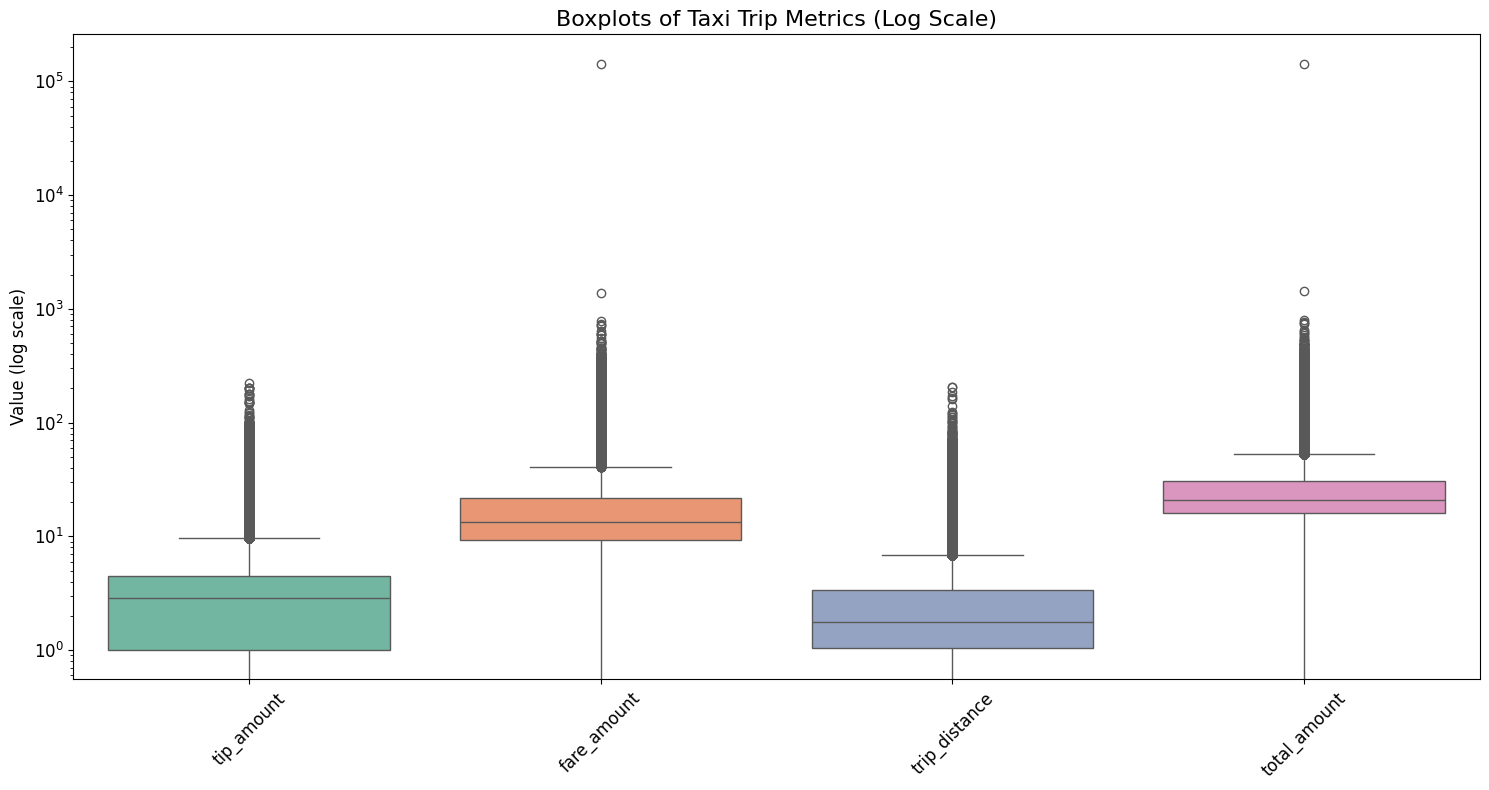

In [34]:
# plot all 4 diagram in one diagram to see the outliers

# Set up the figure
plt.figure(figsize=(15, 8))

# Select the columns to plot
columns = ['tip_amount', 'fare_amount', 'trip_distance', 'total_amount']

# Create boxplots
sns.boxplot(data=df[columns], palette="Set2")

# Add logarithmic scale to handle extreme outliers
plt.yscale('log')

# Add titles and labels
plt.title('Boxplots of Taxi Trip Metrics (Log Scale)', fontsize=16)
plt.ylabel('Value (log scale)', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Rotate x-axis labels
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()

In [35]:
df['RatecodeID'].value_counts()

RatecodeID
1.0     1819895
2.0       75534
99.0      10997
5.0       10771
3.0        6454
4.0        3902
6.0           3
Name: count, dtype: int64

In [36]:
# Ratecode 99.0 seems an outlier as per the segregation of values, So filtering this value.

df = df[df['RatecodeID'] != 99.0]
df['RatecodeID'].value_counts()

RatecodeID
1.0    1819895
2.0      75534
5.0      10771
3.0       6454
4.0       3902
6.0          3
Name: count, dtype: int64

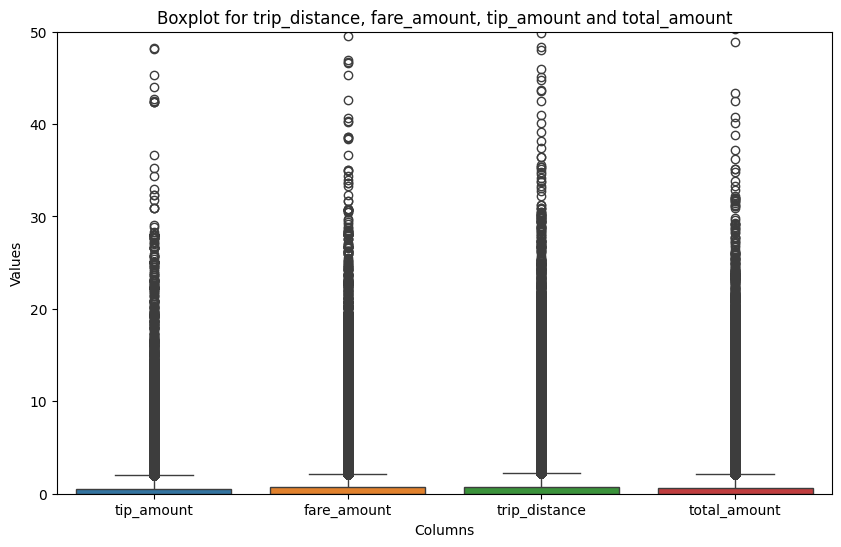

In [37]:
# Do any columns need standardising?

# yes, the below three columns shows in analysis having different values where most of them find in same range with few outliers

# trip distance
q1 = df['trip_distance'].quantile(0.25)
q3 = df['trip_distance'].quantile(0.75)
iqr = q3 - q1

df['trip_distance'] = (df['trip_distance'] - df['trip_distance'].median()) / iqr

# fare amount 
q1 = df['fare_amount'].quantile(0.25)
q3 = df['fare_amount'].quantile(0.75)
iqr = q3 - q1

df['fare_amount'] = (df['fare_amount'] - df['fare_amount'].median()) / iqr

# tip amount 
q1 = df['tip_amount'].quantile(0.25)
q3 = df['tip_amount'].quantile(0.75)
iqr = q3 - q1

df['tip_amount'] = (df['tip_amount'] - df['tip_amount'].median()) / iqr

# total amount
q1 = df['total_amount'].quantile(0.25)
q3 = df['total_amount'].quantile(0.75)
iqr = q3 - q1

df['total_amount'] = (df['total_amount'] - df['total_amount'].median()) / iqr

columns_to_plot = ['tip_amount', 'fare_amount', 'trip_distance', 'total_amount']

# create the boxplot 
plt.figure(figsize=(10,6))  # Adjust the figure size if needed
sns.boxplot(data = df[columns_to_plot])

# Add labels and title
plt.title("Boxplot for trip_distance, fare_amount, tip_amount and total_amount")
plt.xlabel("Columns")
plt.ylabel("Values")
plt.ylim(0,50)

plt.show()

In [38]:
df[['fare_amount', 'tip_amount', 'total_amount']].describe()

,fare_amount,tip_amount,total_amount
count,1.916559e+06,1.916559e+06,1.916559e+06
mean,4.949159e-01,2.112531e-01,5.392297e-01
std,8.333011e+00,1.173221e+00,7.233591e+00
min,-1.071429e+00,-8.242075e-01,-1.434426e+00
25%,-3.333333e-01,-5.360231e-01,-3.442623e-01
50%,0.000000e+00,0.000000e+00,0.000000e+00
75%,6.666667e-01,4.639769e-01,6.557377e-01
max,1.136111e+04,6.346398e+01,9.777763e+03


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1916559 entries, 0 to 1996076
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   PULocationID           int64         
 7   DOLocationID           int64         
 8   payment_type           int64         
 9   fare_amount            float64       
 10  extra                  float64       
 11  mta_tax                float64       
 12  tip_amount             float64       
 13  tolls_amount           float64       
 14  improvement_surcharge  float64       
 15  total_amount           float64       
 16  congestion_surcharge   float64       
 17  airport_fee            float64       
 18  date                   obje

In [40]:
df['date'] = pd.to_datetime(df['date'])
df['passenger_count'] = df['passenger_count'].astype(int)
df['RatecodeID'] = df['RatecodeID'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1916559 entries, 0 to 1996076
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        int32         
 4   trip_distance          float64       
 5   RatecodeID             int32         
 6   PULocationID           int64         
 7   DOLocationID           int64         
 8   payment_type           int64         
 9   fare_amount            float64       
 10  extra                  float64       
 11  mta_tax                float64       
 12  tip_amount             float64       
 13  tolls_amount           float64       
 14  improvement_surcharge  float64       
 15  total_amount           float64       
 16  congestion_surcharge   float64       
 17  airport_fee            float64       
 18  date                   date

### To fix the outliers, we have followed the following steps:

Some points you can look for: Removal of Entries where trip_distance is nearly 0 and fare_amount is more than 300 Removal of Entries where trip_distance and fare_amount are 0 but the pickup and dropoff zones are different Consider Entries where trip_distance is less than or equal to 250 miles. Consider Entries where payment_type is greater than 0

Along with it, Also have dropped the RatecodeID with 99 as value data as well. Later on, have performed standardising on it. At the end, also converted the type of few columns as needed. like date column is made of dateTime type, passenger_count would be integers only, So converted it to integers, Similarly to RatecodeId.

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [41]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee',
 'date',
 'hour']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

## Ans -> 3.1.1

### Numerical variable are 
    . passenger_count
    . trip_distance
    . pickup_hour
    . trip_duration

### Categorical Variable
    . VendorID
    . RatecodeID
    . PULocationID
    . DOLocationID
    . payment_type

### DateTime varibable 
    . tpep_pickup_datetime
    . tpep_dropoff_datetime


### All the below parameter are numerical

    . fare_amount
    . extra
    . mta_tax
    . tip_amount
    . tolls_amount
    . improvement_surcharge
    . total_amount
    . congestion_surcharge
    . airport_fee

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

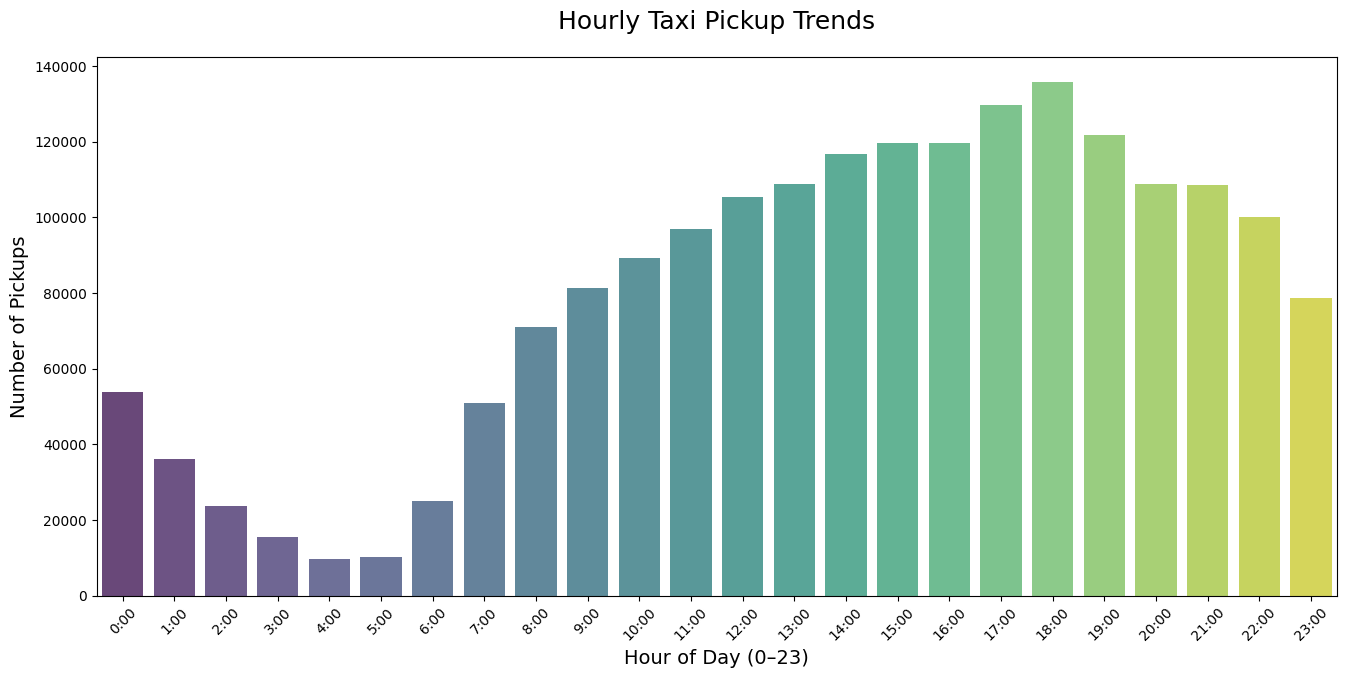

In [42]:
# Find and show the hourly trends in taxi pickups

df['hour'] = df['tpep_pickup_datetime'].dt.hour

# Calculating hourly counts
hourly_counts = df['hour'].value_counts().sort_index().reset_index()
hourly_counts.columns = ['hour', 'pickup_count']


# Create bar plot
plt.figure(figsize=(16, 7))
bar_plot = sns.barplot(x='hour', y='pickup_count', data=hourly_counts, 
                      palette='viridis', alpha=0.8)

# Customize the plot
plt.title('Hourly Taxi Pickup Trends', fontsize=18, pad=20)
plt.xlabel('Hour of Day (0–23)', fontsize=14)
plt.ylabel('Number of Pickups', fontsize=14)
plt.xticks(range(24), [f'{h}:00' for h in range(24)], rotation=45)
plt.grid(False)

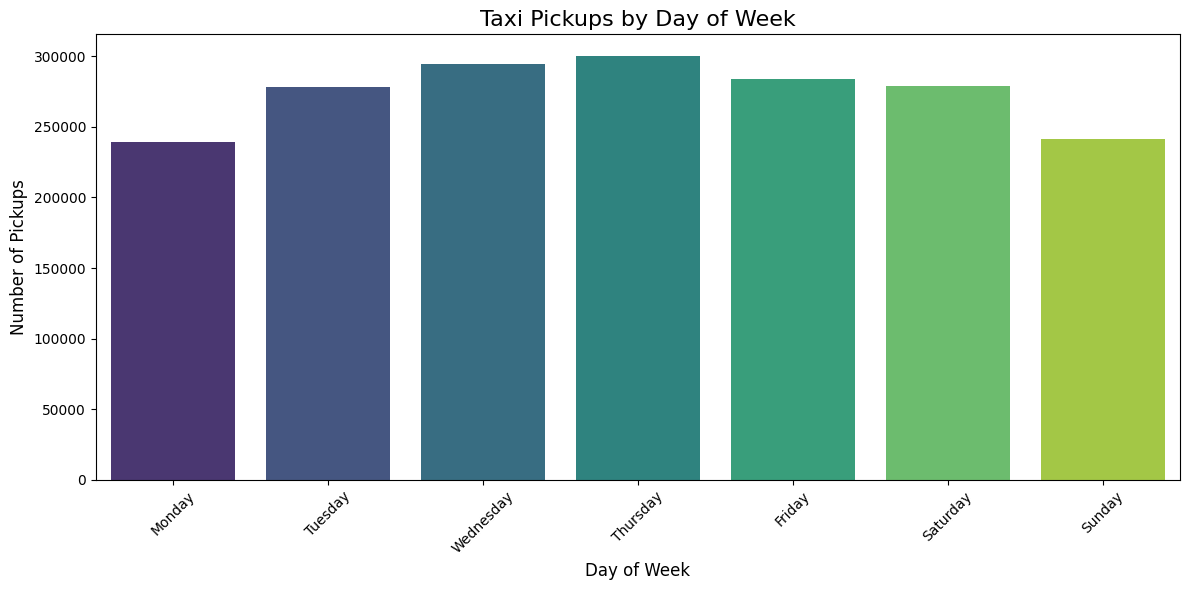

In [43]:
# Find and show the daily trends in taxi pickups (days of the week)

df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

# Extract day of week (0=Monday, 6=Sunday)
df['day_of_week'] = df['tpep_pickup_datetime'].dt.dayofweek
df['day_name'] = df['tpep_pickup_datetime'].dt.day_name()

# Calculating daily pickup counts
daily_counts = df.groupby(['day_of_week', 'day_name']).size().reset_index(name='pickup_count')
daily_counts = daily_counts.sort_values('day_of_week')

# Create ordered list of day names for proper sorting
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_counts['day_name'] = pd.Categorical(daily_counts['day_name'], categories=day_order, ordered=True)
daily_counts = daily_counts.sort_values('day_name')

# Plot daily trends
plt.figure(figsize=(12, 6))
sns.barplot(x='day_name', y='pickup_count', data=daily_counts, 
            palette='viridis', order=day_order,legend=False)

plt.title('Taxi Pickups by Day of Week', fontsize=16)
plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('Number of Pickups', fontsize=12)
plt.xticks(rotation=45)
plt.grid(False)

plt.tight_layout()
plt.show()

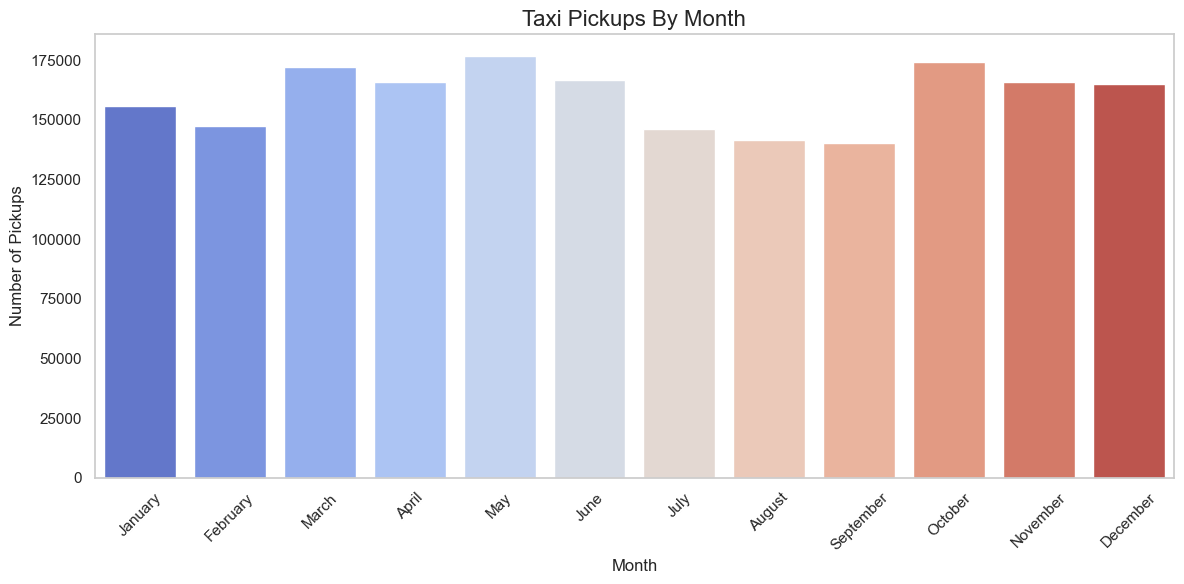

In [44]:
# Show the monthly trends in pickups

sns.set(style="whitegrid")

df['month'] = df['tpep_pickup_datetime'].dt.month_name()
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 
                'July', 'August', 'September', 'October', 'November', 'December']
df['month'] = pd.Categorical(df['month'], categories=months_order, ordered=True)

monthly_pickups = df.groupby('month').size().reset_index(name='pickup_count')
monthly_pickups = monthly_pickups.sort_values('month')

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_pickups, x='month', y='pickup_count', palette='coolwarm')
plt.title('Taxi Pickups By Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Pickups', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(False)
plt.show()


##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [45]:
# Analyse the above parameters

# List of columns to analyze
financial_cols = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']

# Checking zero and negative values
for col in financial_cols:
    total_count = len(df)
    zero_count = (df[col] == 0).sum()
    negative_count = (df[col] < 0).sum()
    
    
    print(f"\nColumn: {col}")
    print(f" - Total rows: {total_count}")
    print(f" - Zero values: {zero_count} ({(zero_count/total_count)*100:.2f}%)")
    print(f" - Negative values: {negative_count} ({(negative_count/total_count)*100:.2f}%)")

# Show basic descriptive stats
print("\nDescriptive statistics:")
print(df[financial_cols].describe())


Column: fare_amount
 - Total rows: 1916559
 - Zero values: 64481 (3.36%)
 - Negative values: 929328 (48.49%)

Column: tip_amount
 - Total rows: 1916559
 - Zero values: 9209 (0.48%)
 - Negative values: 950580 (49.60%)

Column: total_amount
 - Total rows: 1916559
 - Zero values: 23344 (1.22%)
 - Negative values: 950377 (49.59%)

Column: trip_distance
 - Total rows: 1916559
 - Zero values: 3864 (0.20%)
 - Negative values: 957455 (49.96%)

Descriptive statistics:
        fare_amount    tip_amount  total_amount  trip_distance
count  1.916559e+06  1.916559e+06  1.916559e+06   1.916559e+06
mean   4.949159e-01  2.112531e-01  5.392297e-01   7.192829e-01
std    8.333011e+00  1.173221e+00  7.233591e+00   1.978972e+00
min   -1.071429e+00 -8.242075e-01 -1.434426e+00  -7.772926e-01
25%   -3.333333e-01 -5.360231e-01 -3.442623e-01  -3.187773e-01
50%    0.000000e+00  0.000000e+00  0.000000e+00   0.000000e+00
75%    6.666667e-01  4.639769e-01  6.557377e-01   6.812227e-01
max    1.136111e+04  6.346398e+

Yes, all the financial parameters like fare_amount, tip_amount, total_amount, and also trip_distance are having both zero and negative values.

Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

Ans -> Yes, it could be beneficial to create a copy of the DataFrame, leaving out the zero values, depending on our use case.

Removing rows with zero values helps with data cleaning, especially if zeros are invalid or represent missing data.

For instance, a fare_amount of zero might indicate an incomplete or erroneous record.

Filtering out zero values could also improve performance, reducing memory usage and processing time on large datasets.

Moreover, excluding zeros can lead to more accurate statistical analysis by avoiding skewed results.

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [46]:
# Create a df with non zero entries for the selected parameters.

# the distance might be 0 in cases where pickup and drop is in the same zone, So the trip does not make any sense, 
# So it is better to drop such cases of zero distance

cols = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']

# Droping Zero values for the fare_amount, tip_amount, total_amount, total_amount for the better result
df = df[(df['fare_amount'] != 0) &
                (df['tip_amount'] != 0) &
                (df['total_amount'] != 0) &
                (df['total_amount'] != 0)]

print(f"Filtered dataset size (no zeros in key financial columns): {df.shape[0]}")
df.describe()

Filtered dataset size (no zeros in key financial columns): 1834974


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,date,hour,day_of_week
count,1.834974e+06,1834974,1834974,1.834974e+06,1.834974e+06,1.834974e+06,1.834974e+06,1.834974e+06,1.834974e+06,1.834974e+06,...,1.834974e+06,1.834974e+06,1.834974e+06,1.834974e+06,1.834974e+06,1.834974e+06,1.834974e+06,1834974,1.834974e+06,1.834974e+06
mean,1.739448e+00,2023-07-01 20:34:13.558697984,2023-07-01 20:51:38.019620608,1.387185e+00,7.508996e-01,1.077896e+00,1.655284e+02,1.644573e+02,1.206464e+00,5.179749e-01,...,4.951612e-01,2.240499e-01,6.164494e-01,9.993323e-01,5.646656e-01,2.315677e+00,1.497766e-01,2023-07-01 05:45:38.648068352,1.430847e+01,2.998538e+00
min,1.000000e+00,2022-12-31 23:51:30,2022-12-31 23:56:06,1.000000e+00,-7.772926e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-1.071429e+00,...,0.000000e+00,-8.242075e-01,0.000000e+00,0.000000e+00,-1.434426e+00,0.000000e+00,0.000000e+00,2022-12-31 00:00:00,0.000000e+00,0.000000e+00
25%,1.000000e+00,2023-04-01 19:56:41,2023-04-01 20:13:10.500000,1.000000e+00,-3.275109e-01,1.000000e+00,1.320000e+02,1.140000e+02,1.000000e+00,-3.333333e-01,...,5.000000e-01,-5.360231e-01,0.000000e+00,1.000000e+00,-3.620219e-01,2.500000e+00,0.000000e+00,2023-04-01 00:00:00,1.100000e+01,1.000000e+00
50%,2.000000e+00,2023-06-26 06:12:28,2023-06-26 06:34:37,1.000000e+00,-4.366812e-03,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,5.555556e-02,...,5.000000e-01,-2.881844e-03,0.000000e+00,1.000000e+00,3.415301e-03,2.500000e+00,0.000000e+00,2023-06-26 00:00:00,1.500000e+01,3.000000e+00
75%,2.000000e+00,2023-10-05 18:50:30,2023-10-05 19:08:03.249999872,1.000000e+00,7.467249e-01,1.000000e+00,2.340000e+02,2.340000e+02,1.000000e+00,7.222222e-01,...,5.000000e-01,4.870317e-01,0.000000e+00,1.000000e+00,7.103825e-01,2.500000e+00,0.000000e+00,2023-10-05 00:00:00,1.900000e+01,5.000000e+00
max,2.000000e+00,2023-12-31 23:57:51,2024-01-01 20:50:55,6.000000e+00,8.868122e+01,6.000000e+00,2.650000e+02,2.650000e+02,4.000000e+00,1.136111e+04,...,4.000000e+00,6.346398e+01,1.430000e+02,1.000000e+00,9.777763e+03,2.500000e+00,1.750000e+00,2023-12-31 00:00:00,2.300000e+01,6.000000e+00
std,4.389359e-01,NaN,NaN,8.772120e-01,2.015654e+00,4.020378e-01,6.352471e+01,6.977803e+01,4.684893e-01,8.515465e+00,...,4.923195e-02,1.193075e+00,2.218781e+00,2.394939e-02,7.391551e+00,6.533232e-01,4.748170e-01,NaN,5.768280e+00,1.929514e+00


**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

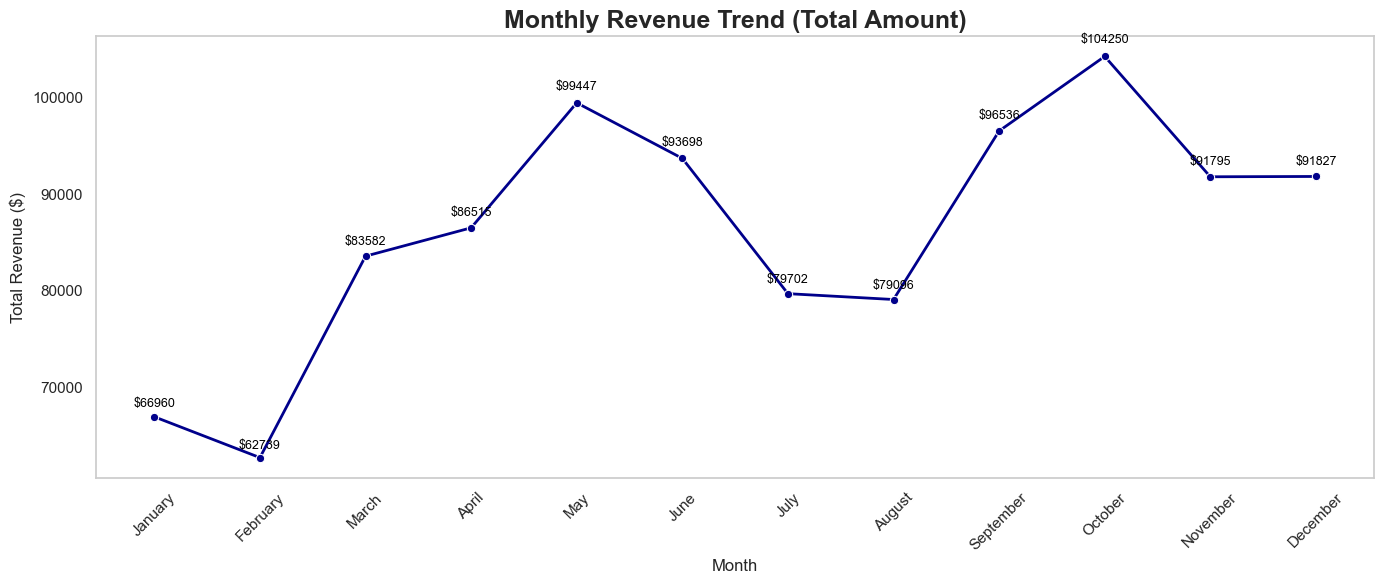

In [47]:
# Group data by month and analyse monthly revenue

sns.set(style="whitegrid")

monthly_revenue = df.groupby('month')['total_amount'].sum().reindex(months_order).reset_index()

plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_revenue, x='month', y='total_amount', marker='o', color='darkblue', linewidth=2)

for i, row in monthly_revenue.iterrows():
    plt.text(i, row['total_amount'] + row['total_amount'] * 0.01,
             f"${row['total_amount']:.0f}", 
             ha='center', va='bottom', fontsize=9, color='black')

plt.title('Monthly Revenue Trend (Total Amount)', fontsize=18, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Revenue ($)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(False)
plt.tight_layout()
plt.show()

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

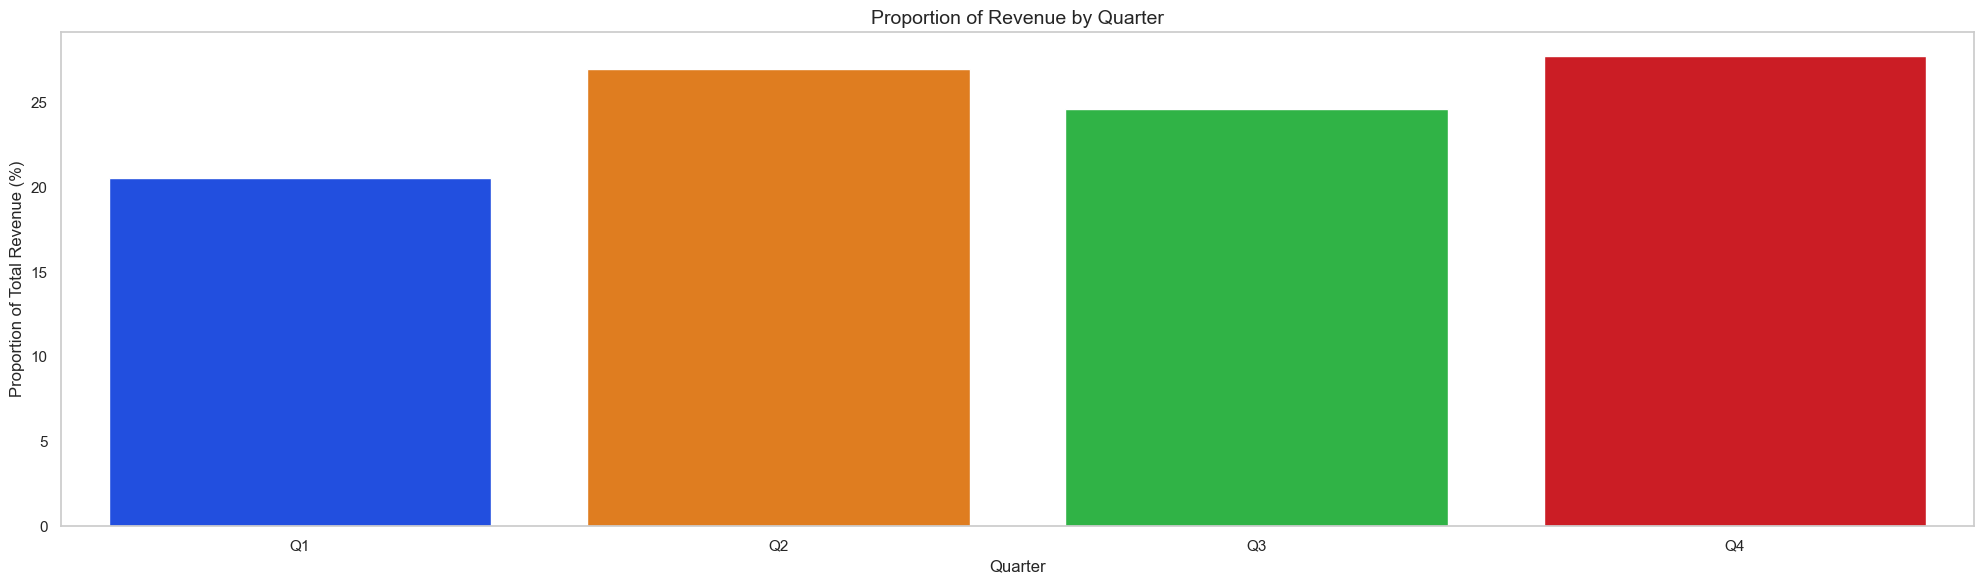

   quarter   total_amount  proportion
0        1  213280.684426   20.584023
1        2  279659.943306   26.990380
2        3  255333.900956   24.642639
3        4  287872.222678   27.782959


In [48]:
# Calculate proportion of each quarter

df['quarter'] = df['tpep_pickup_datetime'].dt.quarter

quarterly_revenue = df.groupby('quarter')['total_amount'].sum().reset_index()
total_revenue = quarterly_revenue['total_amount'].sum()
quarterly_revenue['proportion'] = quarterly_revenue['total_amount'] / total_revenue * 100

plt.figure(figsize=(20, 6))
sns.barplot(data=quarterly_revenue, x='quarter', y='proportion', palette='bright')
plt.title('Proportion of Revenue by Quarter', fontsize=14)
plt.xlabel('Quarter')
plt.ylabel('Proportion of Total Revenue (%)')
plt.xticks([0, 1, 2, 3], ['Q1', 'Q2', 'Q3', 'Q4'])
plt.tight_layout()
plt.grid(False)
plt.show()

print(quarterly_revenue)


**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

Correlation between trip distance and fare amount: 0.9438


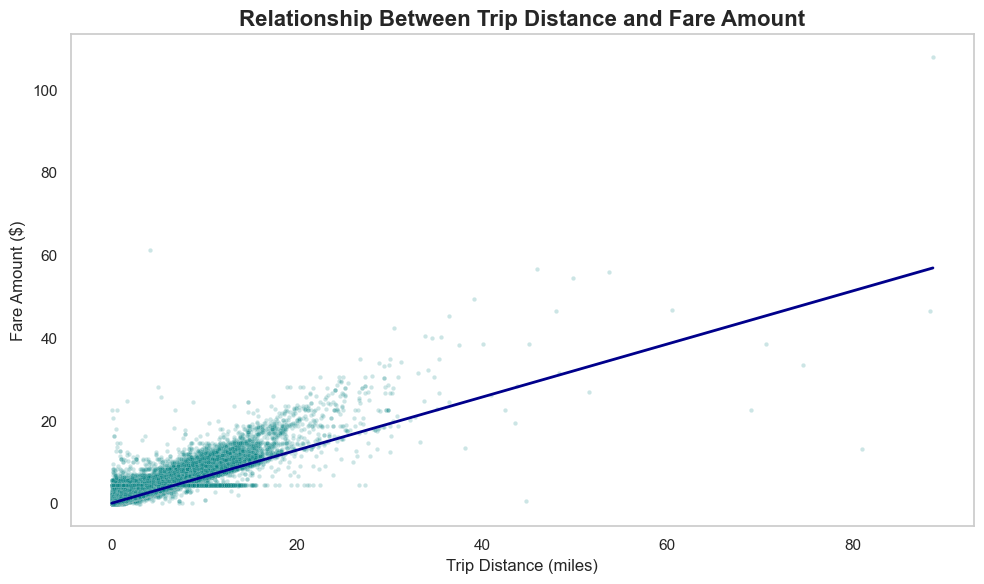

In [49]:
# Show how trip fare is affected by distance

df_dist_fare = df[(df['trip_distance'] > 0) & (df['fare_amount'] > 0)]

# Calculate correlation
correlation = df_dist_fare['trip_distance'].corr(df_dist_fare['fare_amount'])
print(f"Correlation between trip distance and fare amount: {correlation:.4f}")

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_dist_fare, x='trip_distance', y='fare_amount', alpha=0.2, s=10, color='teal')
sns.regplot(data=df_dist_fare, x='trip_distance', y='fare_amount', scatter=False, color='darkblue', line_kws={'linewidth':2})

plt.title('Relationship Between Trip Distance and Fare Amount', fontsize=16, fontweight='bold')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.grid(False)
plt.tight_layout()
plt.show()

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

Correlation between trip duration and fare amount: 0.7119


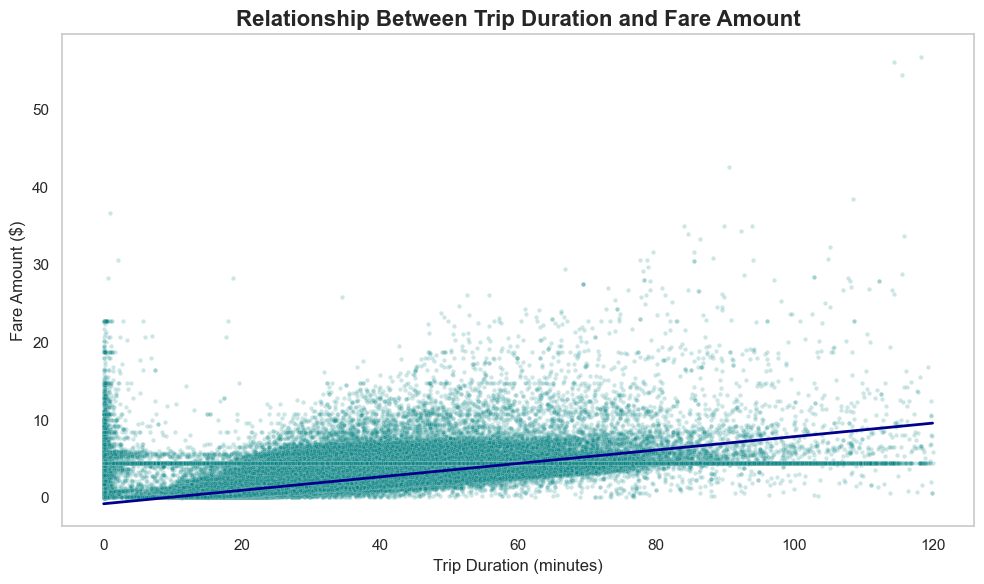

In [50]:
# Show relationship between fare and trip duration

df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60


df_fare_duration = df[
    (df['trip_duration'] > 0) &
    (df['trip_duration'] <= 120) &  # assume limit to 2 hours for clean plot
    (df['fare_amount'] > 0) &
    (df['fare_amount'] <= 400)       # assume: limit high fare outliers
]


correlation = df_fare_duration['trip_duration'].corr(df_fare_duration['fare_amount'])
print(f"Correlation between trip duration and fare amount: {correlation:.4f}")


plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_fare_duration, x='trip_duration', y='fare_amount', alpha=0.2, s=10, color='teal')
sns.regplot(data=df_fare_duration, x='trip_duration', y='fare_amount', scatter=False, color='darkblue', line_kws={'linewidth': 2})

plt.title('Relationship Between Trip Duration and Fare Amount', fontsize=16, fontweight='bold')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Fare Amount ($)')
plt.grid(False)
plt.tight_layout()
plt.show()


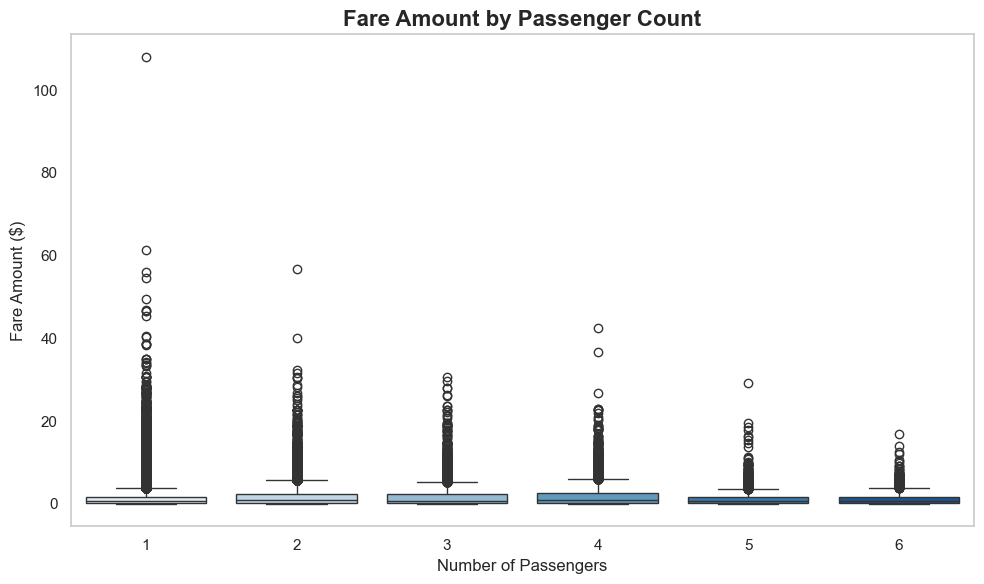

Correlation between passenger count and fare amount: 0.0491


In [51]:
# Show relationship between fare and number of passengers

# Filtering invalid values
df_passenger_fare = df[
    (df['passenger_count'] > 0) &
    (df['fare_amount'] > 0) &
    (df['fare_amount'] <= 400)  # remove high outliers for clarity
]

# limit to common passenger counts (1–6)
df_passenger_fare = df_passenger_fare[df_passenger_fare['passenger_count'] <= 6]


plt.figure(figsize=(10, 6))
sns.boxplot(data=df_passenger_fare, x='passenger_count', y='fare_amount', palette='Blues')

plt.title('Fare Amount by Passenger Count', fontsize=16, fontweight='bold')
plt.xlabel('Number of Passengers')
plt.ylabel('Fare Amount ($)')
plt.grid(False)
plt.tight_layout()
plt.show()

# correlation
correlation = df_passenger_fare['passenger_count'].corr(df_passenger_fare['fare_amount'])
print(f"Correlation between passenger count and fare amount: {correlation:.4f}")


Correlation between trip distance and tip amount: 0.7851


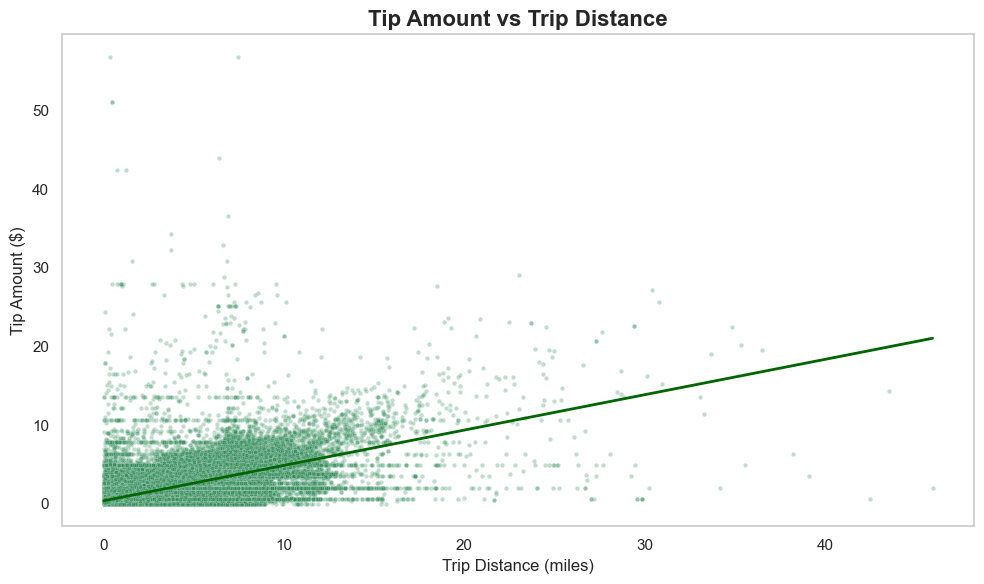

In [52]:
# Show relationship between tip and trip distance

# Filter out zero/negative values and outliers for clarity
df_tip_distance = df[
    (df['trip_distance'] > 0) &
    (df['tip_amount'] >= 0) &
    (df['trip_distance'] <= 100) &  # focus on realistic trips
    (df['tip_amount'] <= 100)       # focus on usual tipping range
]

# correlation calculation
correlation = df_tip_distance['trip_distance'].corr(df_tip_distance['tip_amount'])
print(f"Correlation between trip distance and tip amount: {correlation:.4f}")


plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_tip_distance, x='trip_distance', y='tip_amount', alpha=0.3, s=10, color='seagreen')
sns.regplot(data=df_tip_distance, x='trip_distance', y='tip_amount', scatter=False, color='darkgreen', line_kws={'linewidth': 2})

plt.title('Tip Amount vs Trip Distance', fontsize=16, fontweight='bold')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Tip Amount ($)')
plt.grid(False)
plt.tight_layout()
plt.show()

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

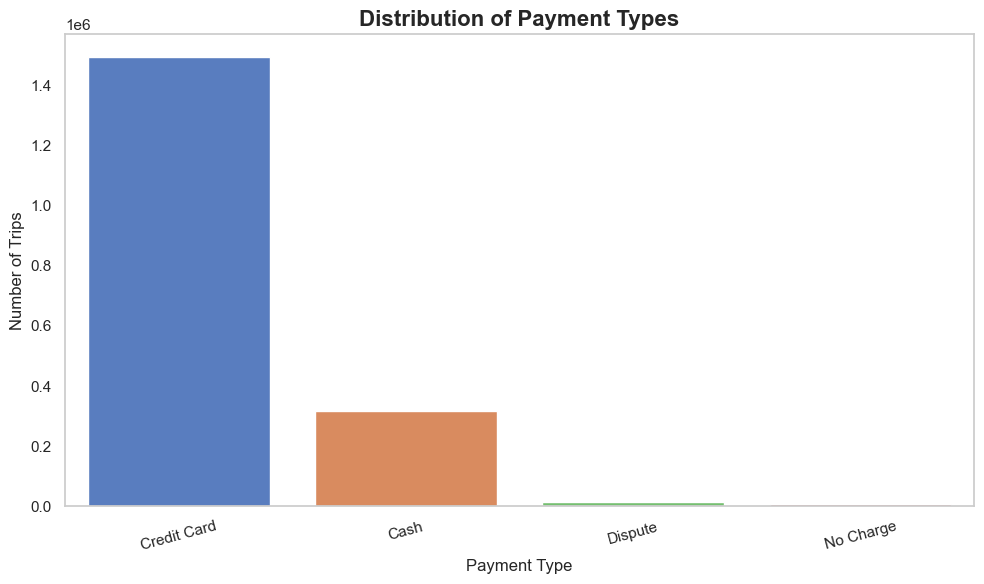

In [53]:
# Analyse the distribution of different payment types (payment_type).

payment_mapping = {
    1: 'Credit Card',
    2: 'Cash',
    3: 'No Charge',
    4: 'Dispute',
    5: 'Unknown',
    6: 'Voided Trip'
}

df['payment_type_label'] = df['payment_type'].map(payment_mapping)

payment_counts = df['payment_type_label'].value_counts().reset_index()
payment_counts.columns = ['Payment Type', 'Count']

plt.figure(figsize=(10, 6))
sns.barplot(data=payment_counts, x='Payment Type', y='Count', palette='muted')
plt.title('Distribution of Payment Types', fontsize=16, fontweight='bold')
plt.xlabel('Payment Type')
plt.ylabel('Number of Trips')
plt.xticks(rotation=15)
plt.tight_layout()
plt.grid(False)
plt.show()


- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [54]:
!pip install geopandas
!pip install scikit-learn
!python -m pip install --upgrade pip

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [55]:
import geopandas as gpd


# Read the shapefile using geopandas
zones = gpd.read_file(r'C:\Users\deepa\OneDrive\Desktop\upgard_material\eda_ass\Datasets and Dictionary\taxi_zones\taxi_zones.shp')
zones.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144..."


Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

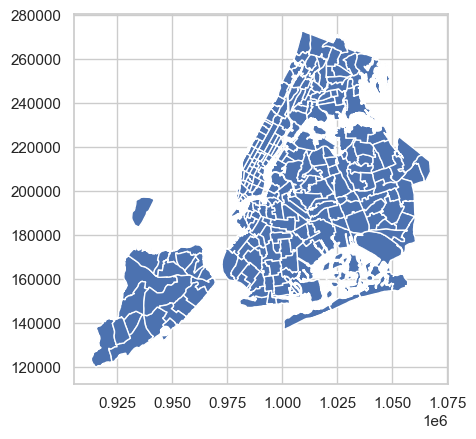

In [56]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [57]:
# Merge zones and trip records using locationID and PULocationID

df_geo = df.merge(
    zones[['LocationID', 'zone', 'borough']],
    left_on='PULocationID',
    right_on='LocationID',
    how='left'
)
df_geo.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,...,hour,day_of_week,day_name,month,quarter,trip_duration,payment_type_label,LocationID,zone,borough
0,2,2023-01-01 00:07:18,2023-01-01 00:23:15,1,2.602620,1,138,256,2,1.500000,...,0,6,Sunday,January,1,15.950000,Cash,138.0,LaGuardia Airport,Queens
1,2,2023-01-01 00:16:41,2023-01-01 00:21:46,2,-0.235808,1,161,237,1,-0.444444,...,0,6,Sunday,January,1,5.083333,Credit Card,161.0,Midtown Center,Manhattan
2,2,2023-01-01 00:14:03,2023-01-01 00:24:36,3,-0.148472,1,237,141,2,-0.166667,...,0,6,Sunday,January,1,10.550000,Cash,237.0,Upper East Side South,Manhattan
3,2,2023-01-01 00:24:30,2023-01-01 00:29:55,1,-0.541485,1,143,142,2,-0.555556,...,0,6,Sunday,January,1,5.416667,Cash,143.0,Lincoln Square West,Manhattan
4,1,2023-01-01 00:42:56,2023-01-01 01:16:33,2,2.323144,1,246,37,1,1.666667,...,0,6,Sunday,January,1,33.616667,Credit Card,246.0,West Chelsea/Hudson Yards,Manhattan


**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [58]:
# Group data by location and calculate the number of trips

pickup_counts = df.groupby('PULocationID').size().reset_index(name='trip_count')

pickup_counts.head()


,PULocationID,trip_count
0,1,218
1,2,2
2,3,5
3,4,1794
4,6,25


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [59]:
# Merge trip counts back to the zones GeoDataFrame

zones_trips = zones.merge(
    pickup_counts[['PULocationID', 'trip_count']],
    left_on='LocationID',
    right_on='PULocationID',
    how='left'
)

# Fill NaN trip counts with 0 (zones that had no trips)
zones_trips['trip_count'] = zones_trips['trip_count'].fillna(0).astype(int)


zones_trips[['LocationID', 'zone', 'borough', 'trip_count']].head()



,LocationID,zone,borough,trip_count
0,1,Newark Airport,EWR,218
1,2,Jamaica Bay,Queens,2
2,3,Allerton/Pelham Gardens,Bronx,5
3,4,Alphabet City,Manhattan,1794
4,5,Arden Heights,Staten Island,0


The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

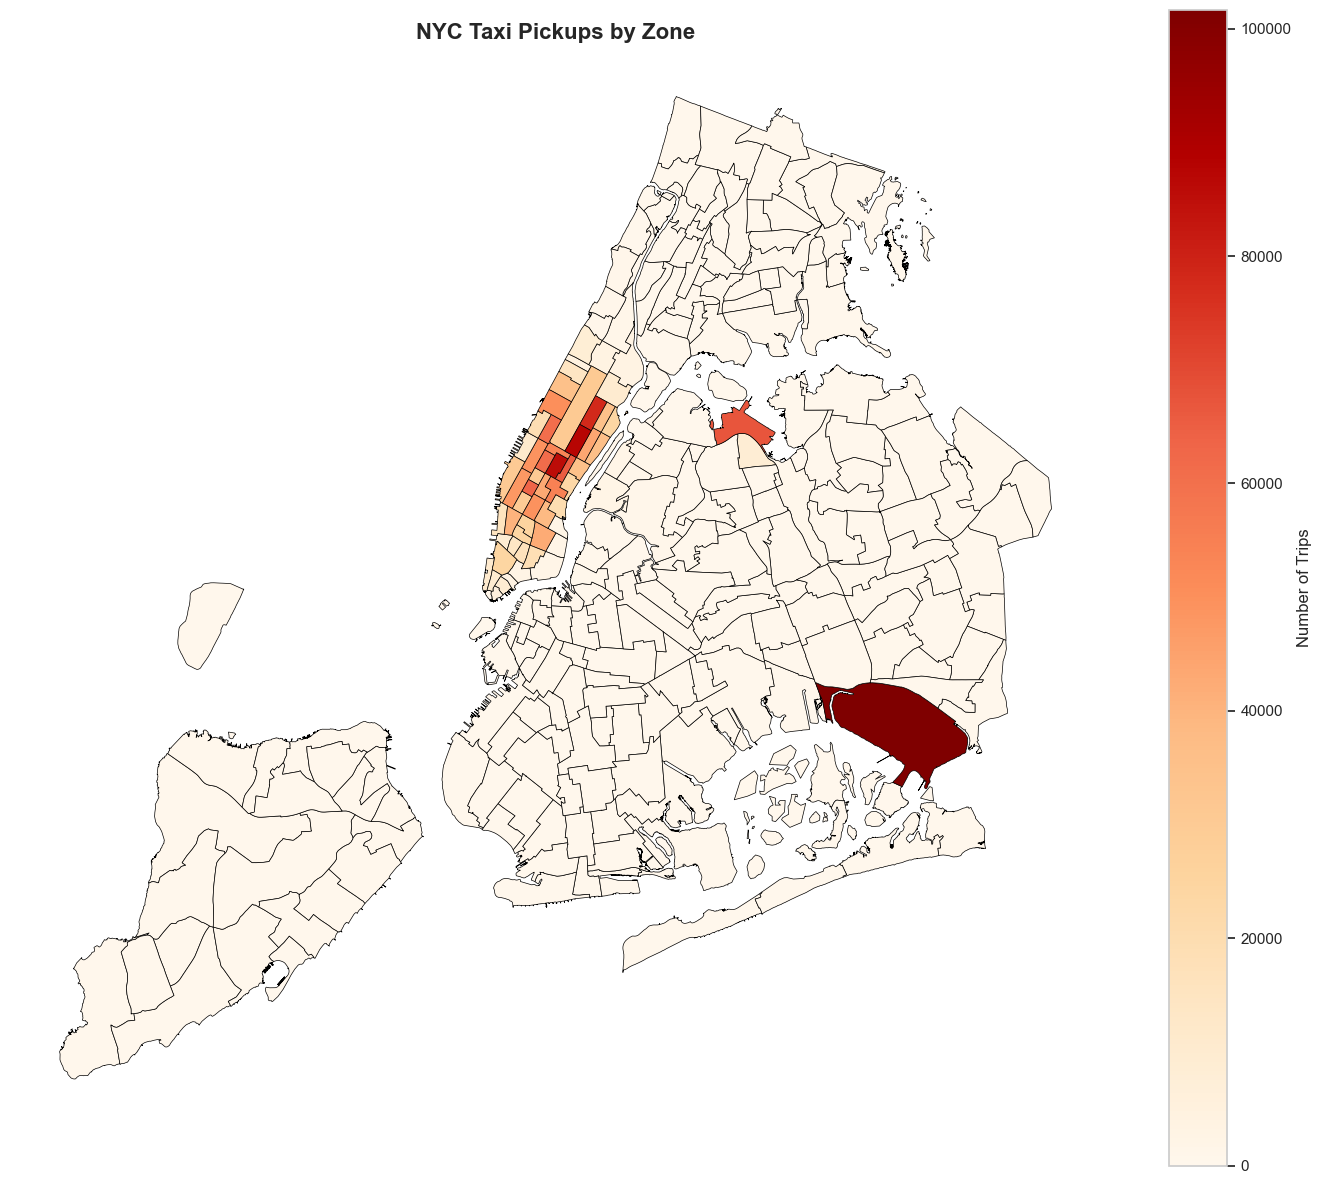

In [60]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize=(14, 12))

# Plot the map and display it

zones_trips.plot(
    column='trip_count',
    ax=ax,
    cmap='OrRd',  # Orange-Red color map
    linewidth=0.5,
    edgecolor='black',
    legend=True,
    legend_kwds={
        'label': "Number of Trips",
        'orientation': "vertical"
    }
)

# Add a title and styling
ax.set_title("NYC Taxi Pickups by Zone", fontsize=16, fontweight='bold')
ax.axis('off')  # Hide axes

# Show the plot
plt.tight_layout()
plt.show()

In [61]:
# can you try displaying the zones DF sorted by the number of trips?

sorted_zones = zones_trips.sort_values('trip_count', ascending=False)

# display top 20 zones by trip count
sorted_zones[['LocationID', 'zone', 'borough', 'trip_count']].head(20)

,LocationID,zone,borough,trip_count
131,132,JFK Airport,Queens,101640
236,237,Upper East Side South,Manhattan,87561
160,161,Midtown Center,Manhattan,85429
235,236,Upper East Side North,Manhattan,78051
137,138,LaGuardia Airport,Queens,67420
161,162,Midtown East,Manhattan,65630
185,186,Penn Station/Madison Sq West,Manhattan,63513
229,230,Times Sq/Theatre District,Manhattan,61480
141,142,Lincoln Square East,Manhattan,60578
169,170,Murray Hill,Manhattan,54412


Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [62]:
# Find routes which have the slowest speeds at different times of the day

df_geo = df_geo[(df_geo['trip_distance'] > 0)]

# Calculate duration in minutes
df_geo['trip_duration_min'] = (df_geo['tpep_dropoff_datetime'] - df_geo['tpep_pickup_datetime']).dt.total_seconds() / 60
df_geo['trip_duration_hrs'] = (df_geo['tpep_dropoff_datetime'] - df_geo['tpep_pickup_datetime']).dt.total_seconds() / 3600


# Filtering outliers -> duration < 180 mins
df_geo = df_geo[(df_geo['trip_duration_min'] > 1) & (df_geo['trip_duration_min'] < 180)]

df_geo['pickup_hour'] = df_geo['tpep_pickup_datetime'].dt.hour

# Group by route and hour
route_hourly = df_geo.groupby(['PULocationID', 'DOLocationID', 'pickup_hour']).agg(
    avg_distance=('trip_distance', 'mean'),
    avg_duration_min=('trip_duration_min', 'mean'),
    trip_count=('trip_distance', 'count')
).reset_index()

# Calculate speed in mph
route_hourly['avg_speed_mph'] = route_hourly['avg_distance'] / (route_hourly['avg_duration_min'] / 60)

# Filter to only routes with at least 25 trips to reduce noise
slow_routes = route_hourly[route_hourly['trip_count'] >= 25]

# Sort by lowest speed
slow_routes = slow_routes.sort_values(by='avg_speed_mph').reset_index(drop=True)

# Show top 10 slowest routes by hour
slow_routes.head(10)


,PULocationID,DOLocationID,pickup_hour,avg_distance,avg_duration_min,trip_count,avg_speed_mph
0,186,233,9,0.065502,21.815104,32,0.180156
1,113,170,11,0.052402,17.051333,25,0.184391
2,113,170,17,0.050461,15.008642,27,0.201728
3,162,186,17,0.070772,20.422414,29,0.207926
4,186,163,18,0.076419,21.653205,26,0.211754
5,163,186,16,0.082705,23.220707,33,0.213701
6,186,162,10,0.088256,24.028070,57,0.220381
7,238,142,12,0.049961,12.908333,34,0.232229
8,186,163,12,0.104279,26.938667,25,0.232260
9,162,186,16,0.081962,20.815812,39,0.236248


How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

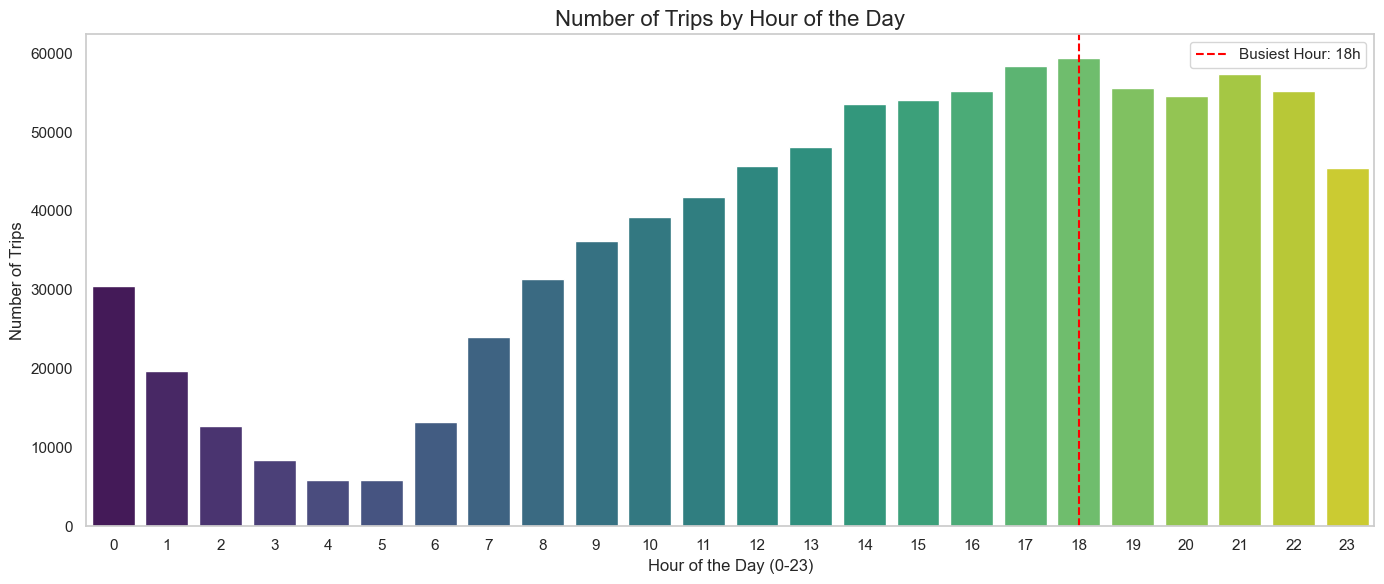

 Busiest Hour: 18:00 with 59419 trips.


In [63]:
# Visualise the number of trips per hour and find the busiest hour

hourly_trip_counts = df_geo.groupby('hour').size().reset_index(name='trip_count')

# Find the busiest hour
busiest_hour = hourly_trip_counts.loc[hourly_trip_counts['trip_count'].idxmax()]

#/**********************************************************************************************************************

plt.figure(figsize=(14, 6))
sns.barplot(x='hour', y='trip_count', data=hourly_trip_counts, palette='viridis')

# Highlight the busiest hour
plt.axvline(x=busiest_hour['hour'], color='red', linestyle='--', label=f"Busiest Hour: {busiest_hour['hour']}h")

plt.title('Number of Trips by Hour of the Day', fontsize=16)
plt.xlabel('Hour of the Day (0-23)', fontsize=12)
plt.ylabel('Number of Trips', fontsize=12)
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()

#/************************************************************************************************************************

print(f" Busiest Hour: {int(busiest_hour['hour'])}:00 with {busiest_hour['trip_count']} trips.")

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [64]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers

top_hours_sample = df_geo.groupby('hour').size().reset_index(name='sampled_trip_count')

#Get top 5 busiest hours from sampled data
top_5_sampled = top_hours_sample.sort_values(by='sampled_trip_count', ascending=False).head(5)

#Scale up using sampling fraction of 1%
sampling_frac = 0.01  

# Estimate actual number of trips
top_5_sampled['estimated_actual_trips'] = (top_5_sampled['sampled_trip_count'] / sampling_frac).astype(int)


print("Top 5 Busiest Hours with Estimated Actual Trips:")
print(top_5_sampled.sort_values(by='estimated_actual_trips', ascending=False))



Top 5 Busiest Hours with Estimated Actual Trips:
    hour  sampled_trip_count  estimated_actual_trips
18    18               59419                 5941900
17    17               58326                 5832600
21    21               57344                 5734400
19    19               55556                 5555600
22    22               55232                 5523200


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

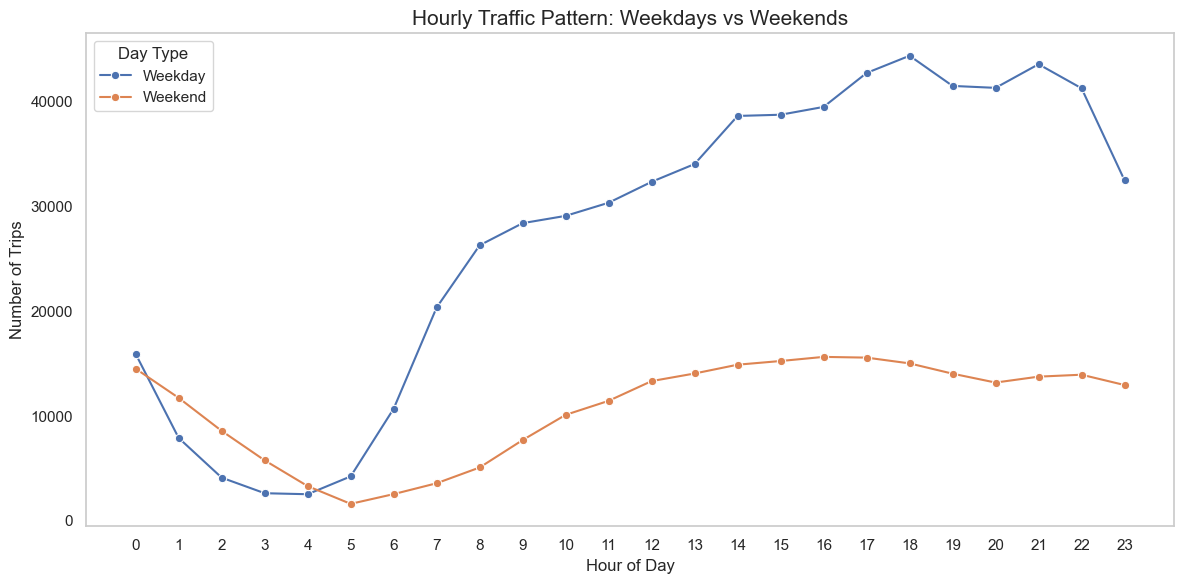

In [65]:
# Compare traffic trends for the week days and weekends

df_geo['tpep_pickup_datetime'] = pd.to_datetime(df_geo['tpep_pickup_datetime'])
df_geo['day_of_week'] = df_geo['tpep_pickup_datetime'].dt.dayofweek  # 0=Mon, 6=Sun


df_geo['day_type'] = df_geo['day_of_week'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

# Group by hour and day type to count trips
hourly_traffic = df_geo.groupby(['hour', 'day_type']).size().reset_index(name='trip_count')


plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_traffic, x='hour', y='trip_count', hue='day_type', marker='o')

plt.title('Hourly Traffic Pattern: Weekdays vs Weekends', fontsize=15)
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.xticks(range(0, 24))
plt.grid(False)
plt.tight_layout()
plt.legend(title='Day Type')
plt.show()


What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [66]:
# Find top 10 pickup and dropoff zones

# Count hourly pickups by PULocationID
pickup_counts_by_zone = df_geo.groupby(['PULocationID', 'hour']).size().reset_index(name='pickup_count')

# Identify top 10 pickup zones by total pickup count
top_pickup_zones = pickup_counts_by_zone.groupby('PULocationID')['pickup_count'].sum().sort_values(ascending=False).head(10)

# Count hourly dropoffs by DOLocationID
dropoff_counts_by_zone = df_geo.groupby(['DOLocationID', 'hour']).size().reset_index(name='dropoff_count')

# Identify top 10 dropoff zones by total dropoff count
top_dropoff_zones = dropoff_counts_by_zone.groupby('DOLocationID')['dropoff_count'].sum().sort_values(ascending=False).head(10)


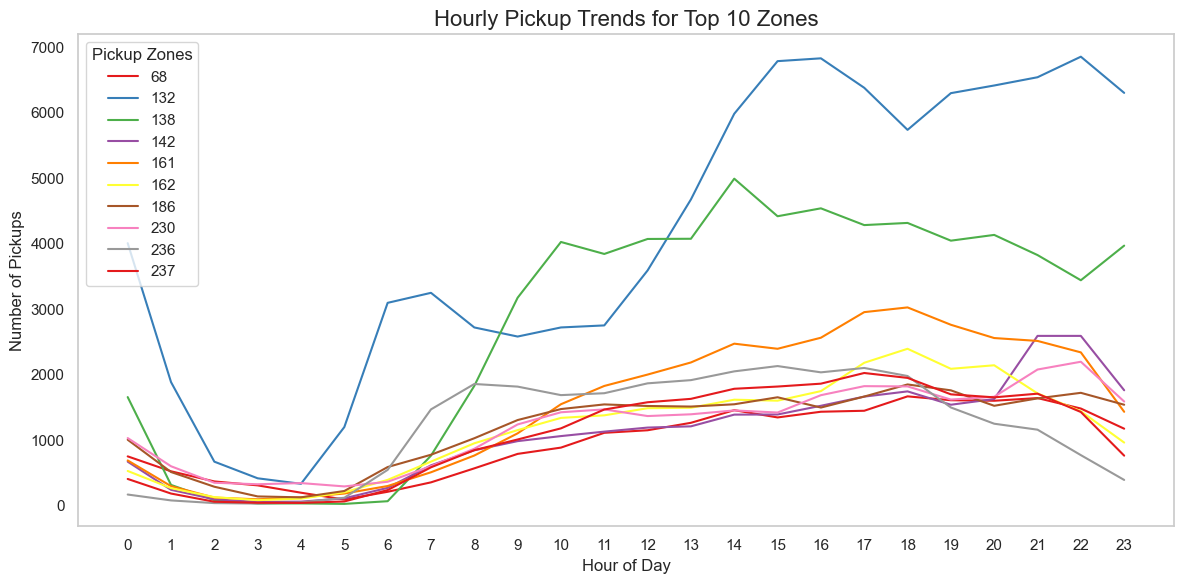

In [67]:
# Plot pickup trends for top pickup zones

plt.figure(figsize=(12, 6))
sns.lineplot(data=pickup_counts_by_zone[pickup_counts_by_zone['PULocationID'].isin(top_pickup_zones.index)],
             x='hour', y='pickup_count', hue='PULocationID', palette='Set1')

plt.title('Hourly Pickup Trends for Top 10 Zones', fontsize=16)
plt.xlabel('Hour of Day')
plt.ylabel('Number of Pickups')
plt.xticks(range(0, 24))
plt.grid(False)
plt.legend(title='Pickup Zones')
plt.tight_layout()
plt.show()


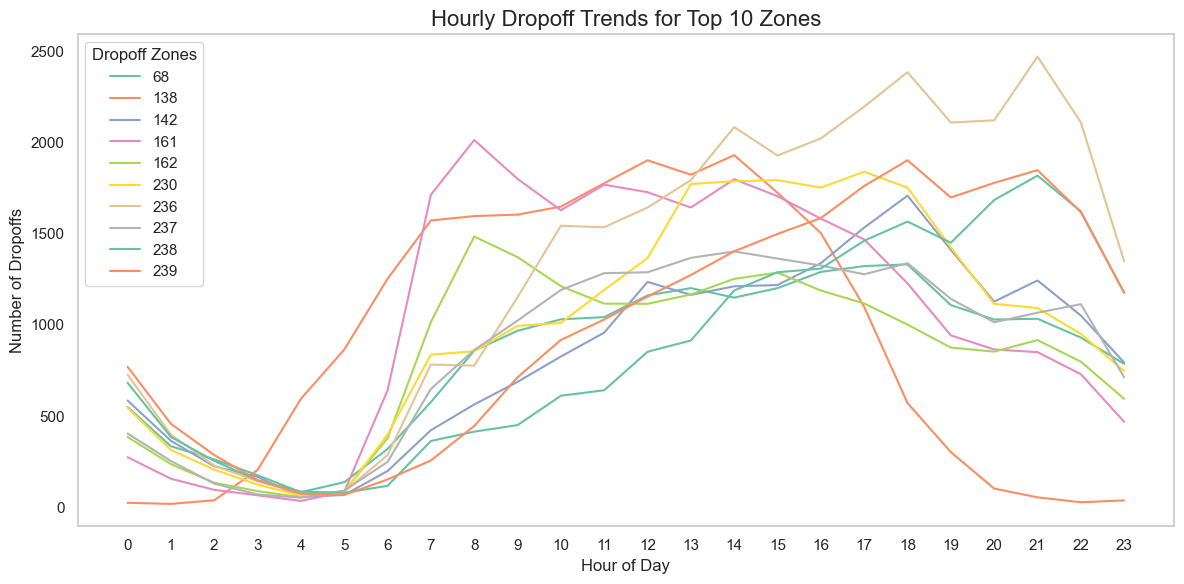

In [68]:
# Plot dropoff trends for top dropoff zones

plt.figure(figsize=(12, 6))
sns.lineplot(data=dropoff_counts_by_zone[dropoff_counts_by_zone['DOLocationID'].isin(top_dropoff_zones.index)],
             x='hour', y='dropoff_count', hue='DOLocationID', palette='Set2')

plt.title('Hourly Dropoff Trends for Top 10 Zones', fontsize=16)
plt.xlabel('Hour of Day')
plt.ylabel('Number of Dropoffs')
plt.xticks(range(0, 24))

plt.grid(False)

plt.legend(title='Dropoff Zones')
plt.tight_layout()
plt.show()

**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [69]:
# Find the top 10 and bottom 10 pickup/dropoff ratios

# Group by PULocationID and DOLocationID to get pickup and dropoff counts
pickup_counts = df_geo['PULocationID'].value_counts().rename('pickup_count')
dropoff_counts = df_geo['DOLocationID'].value_counts().rename('dropoff_count')

# Combine counts into one DataFrame
pickup_dropoff_df = pd.concat([pickup_counts, dropoff_counts], axis=1).fillna(0)

# Calculate pickup/dropoff ratio
pickup_dropoff_df['pickup_dropoff_ratio'] = pickup_dropoff_df['pickup_count'] / pickup_dropoff_df['dropoff_count'].replace(0, np.nan)

# Remove duplicate LocationID values in zones to avoid InvalidIndexError
zones_unique = zones.drop_duplicates(subset='LocationID').set_index('LocationID')

# Map zone names safely
pickup_dropoff_df['zone'] = pickup_dropoff_df.index.map(zones_unique['zone'])

# Top 10 highest pickup/dropoff ratios
top_10_ratios = pickup_dropoff_df.sort_values('pickup_dropoff_ratio', ascending=False).head(10)

# Bottom 10 lowest pickup/dropoff ratios (excluding dropoff_count = 0 to avoid div-by-zero)
bottom_10_ratios = pickup_dropoff_df[pickup_dropoff_df['dropoff_count'] > 0].sort_values('pickup_dropoff_ratio').head(10)


print("Top 10 Zones by Pickup/Dropoff Ratio:")
print(top_10_ratios[['zone', 'pickup_count', 'dropoff_count', 'pickup_dropoff_ratio']])

print("\nBottom 10 Zones by Pickup/Dropoff Ratio:")
print(bottom_10_ratios[['zone', 'pickup_count', 'dropoff_count', 'pickup_dropoff_ratio']])


Top 10 Zones by Pickup/Dropoff Ratio:
                             zone  pickup_count  dropoff_count  \
70                  East Elmhurst        8266.0          539.0   
132                   JFK Airport       98038.0        18853.0   
138             LaGuardia Airport       65950.0        22287.0   
186  Penn Station/Madison Sq West       28412.0        13440.0   
249                  West Village       19037.0        12654.0   
114       Greenwich Village South       12005.0         8241.0   
161                Midtown Center       36742.0        25299.0   
43                   Central Park       13580.0         9451.0   
162                  Midtown East       28041.0        19746.0   
100              Garment District       12367.0         9064.0   

     pickup_dropoff_ratio  
70              15.335807  
132              5.200127  
138              2.959124  
186              2.113988  
249              1.504425  
114              1.456741  
161              1.452310  
43         

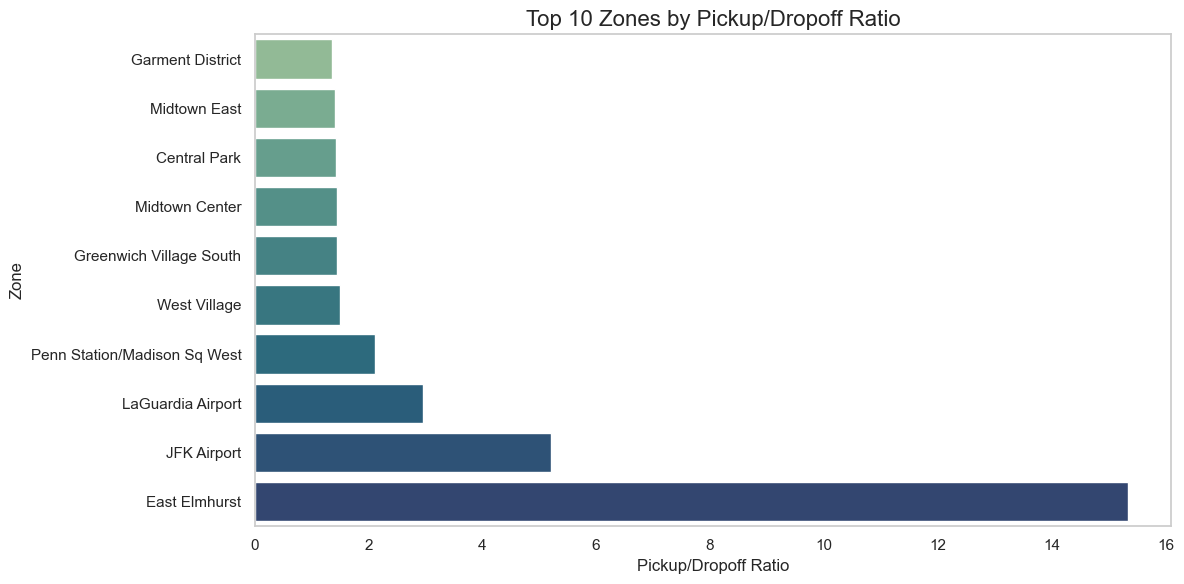

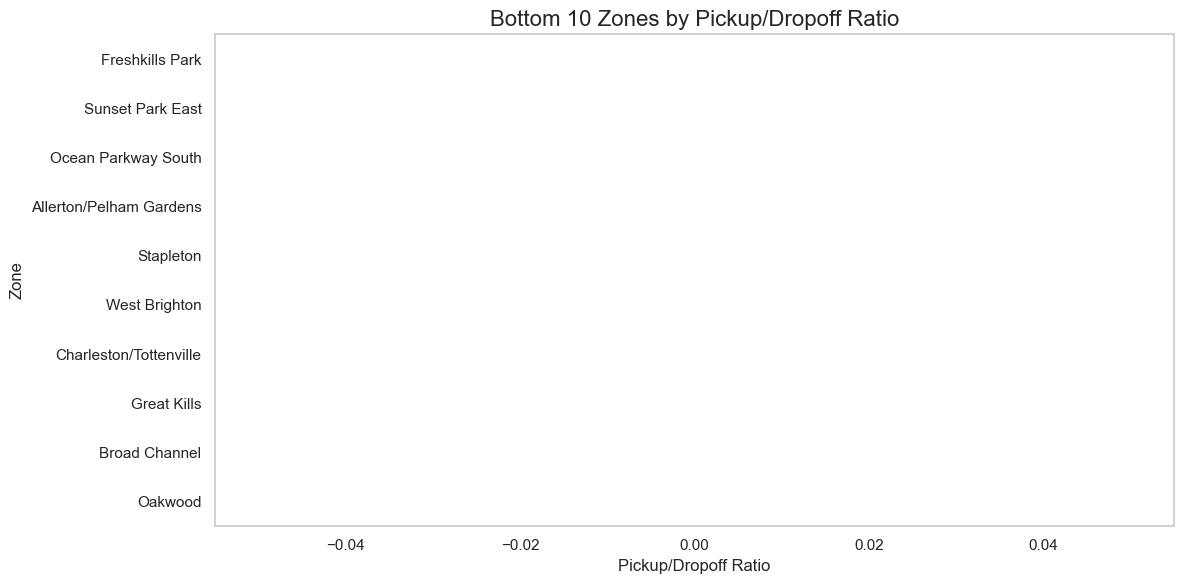

In [70]:
# represent the top 10 and bottom 10 pickup/dropoff ratios

sns.set(style="whitegrid")

# Prepare data for top 10 ratios
top_plot = top_10_ratios.reset_index().sort_values('pickup_dropoff_ratio', ascending=True)

# Plot top 10 pickup/dropoff ratios
plt.figure(figsize=(12, 6))
sns.barplot(data=top_plot, x='pickup_dropoff_ratio', y='zone', palette='crest')
plt.title('Top 10 Zones by Pickup/Dropoff Ratio', fontsize=16)
plt.xlabel('Pickup/Dropoff Ratio')
plt.ylabel('Zone')
plt.grid(False)
plt.tight_layout()
plt.show()

# Prepare data for bottom 10 ratios
bottom_plot = bottom_10_ratios.reset_index().sort_values('pickup_dropoff_ratio', ascending=True)

# Plot bottom 10 pickup/dropoff ratios
plt.figure(figsize=(12, 6))
sns.barplot(data=bottom_plot, x='pickup_dropoff_ratio', y='zone', palette='flare')
plt.title('Bottom 10 Zones by Pickup/Dropoff Ratio', fontsize=16)
plt.xlabel('Pickup/Dropoff Ratio')
plt.ylabel('Zone')
plt.grid(False)
plt.tight_layout()
plt.show()

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [71]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

# Filter for night hours (11 PM to 5 AM inclusive)
night_df = df_geo[(df_geo['hour'] >= 23) | (df_geo['hour'] <= 5)]

# Ensure unique LocationID in zones GeoDataFrame for proper mapping
zone_mapping = zones.drop_duplicates(subset='LocationID').set_index('LocationID')['zone']

# Top 10 pickup zones during night
night_pickups = night_df['PULocationID'].value_counts().head(10).rename_axis('LocationID').reset_index(name='pickup_count')
night_pickups['zone'] = night_pickups['LocationID'].map(zone_mapping)

# Top 10 dropoff zones during night
night_dropoffs = night_df['DOLocationID'].value_counts().head(10).rename_axis('LocationID').reset_index(name='dropoff_count')
night_dropoffs['zone'] = night_dropoffs['LocationID'].map(zone_mapping)


print("Top 10 Pickup Zones during Night Hours:")
print(night_pickups)

print("\nTop 10 Dropoff Zones during Night Hours:")
print(night_dropoffs)


Top 10 Pickup Zones during Night Hours:
   LocationID  pickup_count                          zone
0         132         14810                   JFK Airport
1          79          8679                  East Village
2         249          6964                  West Village
3         138          6107             LaGuardia Airport
4         148          6070               Lower East Side
5          48          5752                  Clinton East
6         114          4675       Greenwich Village South
7         230          4521     Times Sq/Theatre District
8         186          3823  Penn Station/Madison Sq West
9          68          3405                  East Chelsea

Top 10 Dropoff Zones during Night Hours:
   LocationID  dropoff_count                   zone
0         263           3845         Yorkville West
1         141           3254        Lenox Hill West
2          48           3175           Clinton East
3         236           3009  Upper East Side North
4         239       

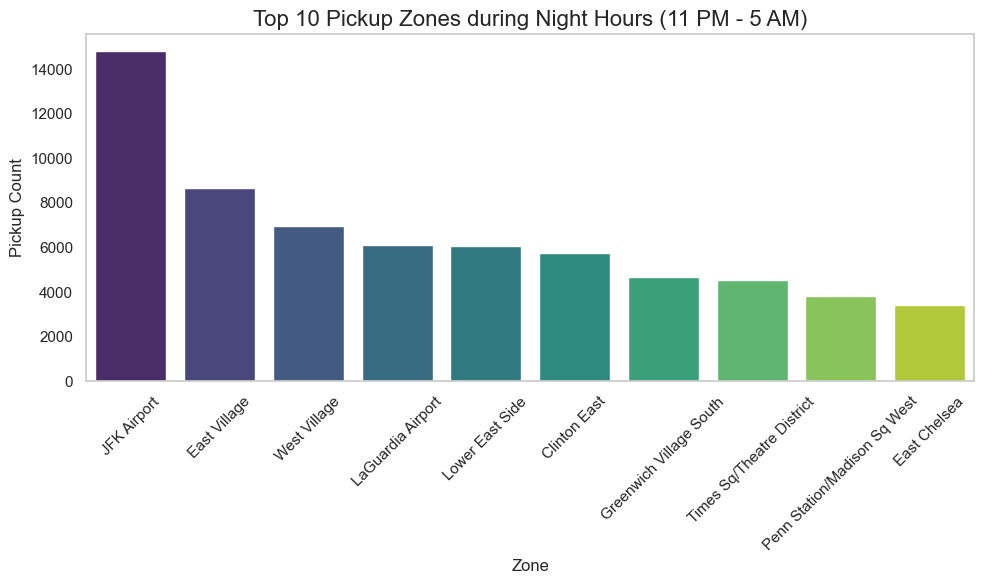

In [72]:
# Visualizing the top 10 pickup zones during night hours

plt.figure(figsize=(10, 6))
sns.barplot(data=night_pickups, x='zone', y='pickup_count', palette='viridis')
plt.title('Top 10 Pickup Zones during Night Hours (11 PM - 5 AM)', fontsize=16)
plt.xlabel('Zone')
plt.ylabel('Pickup Count')
plt.xticks(rotation=45)

plt.grid(False)

plt.tight_layout()
plt.show()


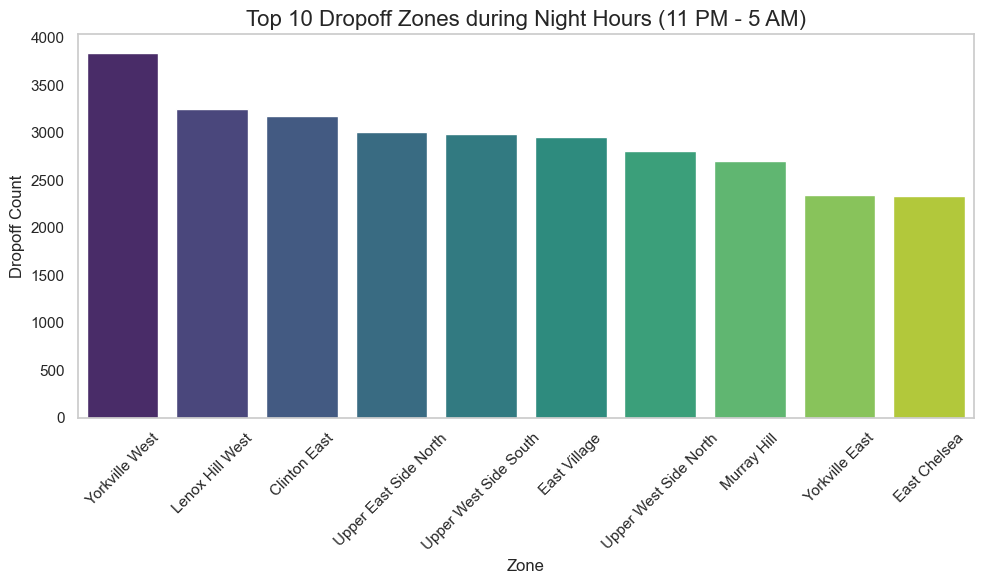

In [73]:
# Visualizing the top 10 dropoff zones during night hours

plt.figure(figsize=(10, 6))
sns.barplot(data=night_dropoffs, x='zone', y='dropoff_count', palette='viridis')
plt.title('Top 10 Dropoff Zones during Night Hours (11 PM - 5 AM)', fontsize=16)
plt.xlabel('Zone')
plt.ylabel('Dropoff Count')
plt.xticks(rotation=45)

plt.grid(False)

plt.tight_layout()
plt.show()

Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [74]:
# Filter for night hours (11 PM to 5 AM)

night_df = df_geo[(df_geo['hour'] >= 23) | (df_geo['hour'] <= 5)]

# Filtering daytime hours (6 AM to 10 PM)
day_df = df_geo[(df_geo['hour'] >= 6) & (df_geo['hour'] <= 22)]

night_revenue = night_df['total_amount'].sum()
day_revenue = day_df['total_amount'].sum()

total_revenue = df_geo['total_amount'].sum()

# Calculating revenue share
night_revenue_share = (night_revenue / total_revenue) * 100
day_revenue_share = (day_revenue / total_revenue) * 100

print(f"Night Time Revenue Share (11 PM - 5 AM): {night_revenue_share:.2f}%")
print(f"Day Time Revenue Share (6 AM - 10 PM): {day_revenue_share:.2f}%")

Night Time Revenue Share (11 PM - 5 AM): 12.29%
Day Time Revenue Share (6 AM - 10 PM): 87.71%


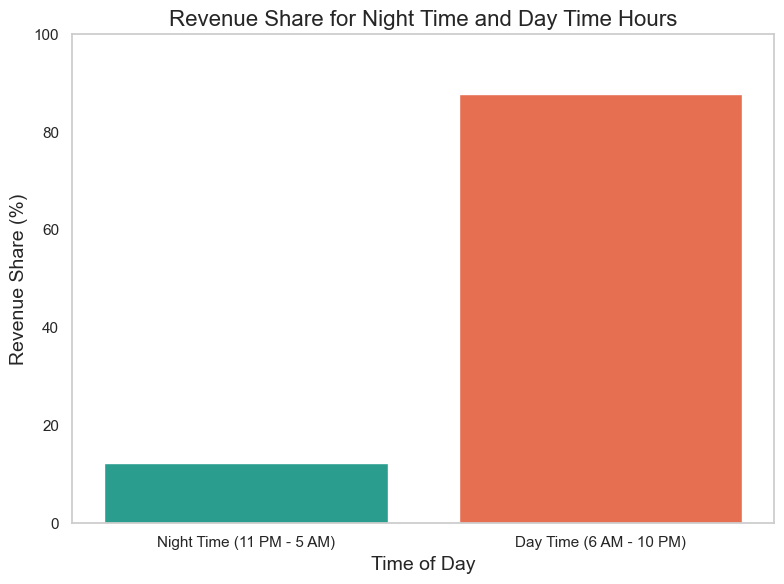

In [75]:
# plotting data
labels = ['Night Time (11 PM - 5 AM)', 'Day Time (6 AM - 10 PM)']
values = [night_revenue_share, day_revenue_share]


plt.figure(figsize=(8, 6))
plt.bar(labels, values, color=['#2a9d8f', '#e76f51'])
plt.xlabel('Time of Day', fontsize=14)
plt.ylabel('Revenue Share (%)', fontsize=14)
plt.title('Revenue Share for Night Time and Day Time Hours', fontsize=16)
plt.ylim(0, 100)

plt.grid(False)

plt.tight_layout()
plt.show()

##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [76]:
# Analyse the fare per mile per passenger for different passenger counts

df_valid = df_geo[
    (df_geo['fare_amount']  > 0) &
    (df_geo['trip_distance']  > 0) &
    (df_geo['passenger_count']> 0)]
    
df_valid['fare_per_mile'] = df_valid['fare_amount'] / df_valid['trip_distance']

avg_fare_per_mile = df_valid.groupby('passenger_count')['fare_per_mile'].mean().reset_index()
avg_fare_per_mile.columns = ['passenger_count', 'avg_fare_per_mile']
print(avg_fare_per_mile)


   passenger_count  avg_fare_per_mile
0                1           1.444605
1                2           1.380790
2                3           1.468744
3                4           1.467013
4                5           1.307002
5                6           1.285484


**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

    hour  fare_per_mile
0      0       0.015478
1      1      -0.197029
2      2      -0.399149
3      3      -0.407081
4      4      -0.243025
5      5      -0.108559
6      6      -0.516940
7      7      -0.138698
8      8       0.612381
9      9       0.957150
10    10       1.106047
11    11       1.397130
12    12       1.520397
13    13       1.431924
14    14       1.491706
15    15       1.565996
16    16       1.482453
17    17       1.296989
18    18       0.993657
19    19       0.578951
20    20       0.323619
21    21       0.214653
22    22       0.207641
23    23       0.161851
   day_of_week  fare_per_mile
0            0       0.507786
1            1       1.020311
2            2       1.113286
3            3       1.133591
4            4       0.844758
5            5       0.625112
6            6       0.284437


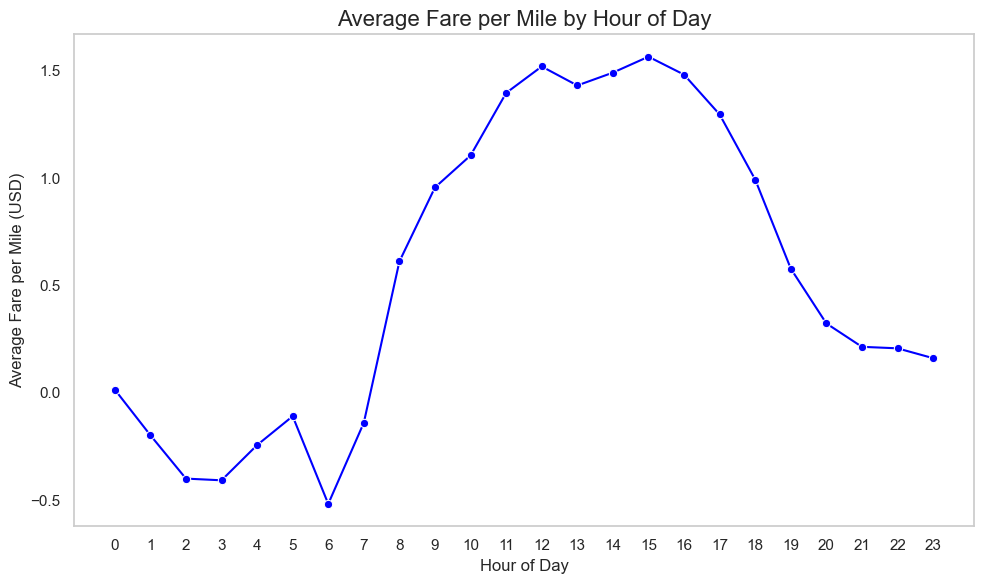

In [77]:
# Compare the average fare per mile for different days and for different times of the day


# Recalculate 'fare_per_mile' and 'fare_per_mile_per_passenger'
df_geo['fare_per_mile'] = df_geo['fare_amount'] / df_geo['trip_distance']
df_geo['fare_per_mile_per_passenger'] = df_geo['fare_per_mile'] / df_geo['passenger_count']

# Remove any rows where 'fare_per_mile_per_passenger' is NaN (which could happen if passenger_count is zero)
df = df_geo.dropna(subset=['fare_per_mile_per_passenger'])

avg_fare_per_mile_by_hour = df_geo.groupby('hour')['fare_per_mile'].mean().reset_index()

# Group by day of the week and calculate average fare per mile
avg_fare_per_mile_by_day = df_geo.groupby('day_of_week')['fare_per_mile'].mean().reset_index()


print(avg_fare_per_mile_by_hour)
print(avg_fare_per_mile_by_day)

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_fare_per_mile_by_hour, x='hour', y='fare_per_mile', marker='o', color='blue')
plt.title('Average Fare per Mile by Hour of Day', fontsize=16)
plt.xlabel('Hour of Day')
plt.ylabel('Average Fare per Mile (USD)')
plt.xticks(range(0, 24))
plt.grid(False)
plt.tight_layout()
plt.show()


**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

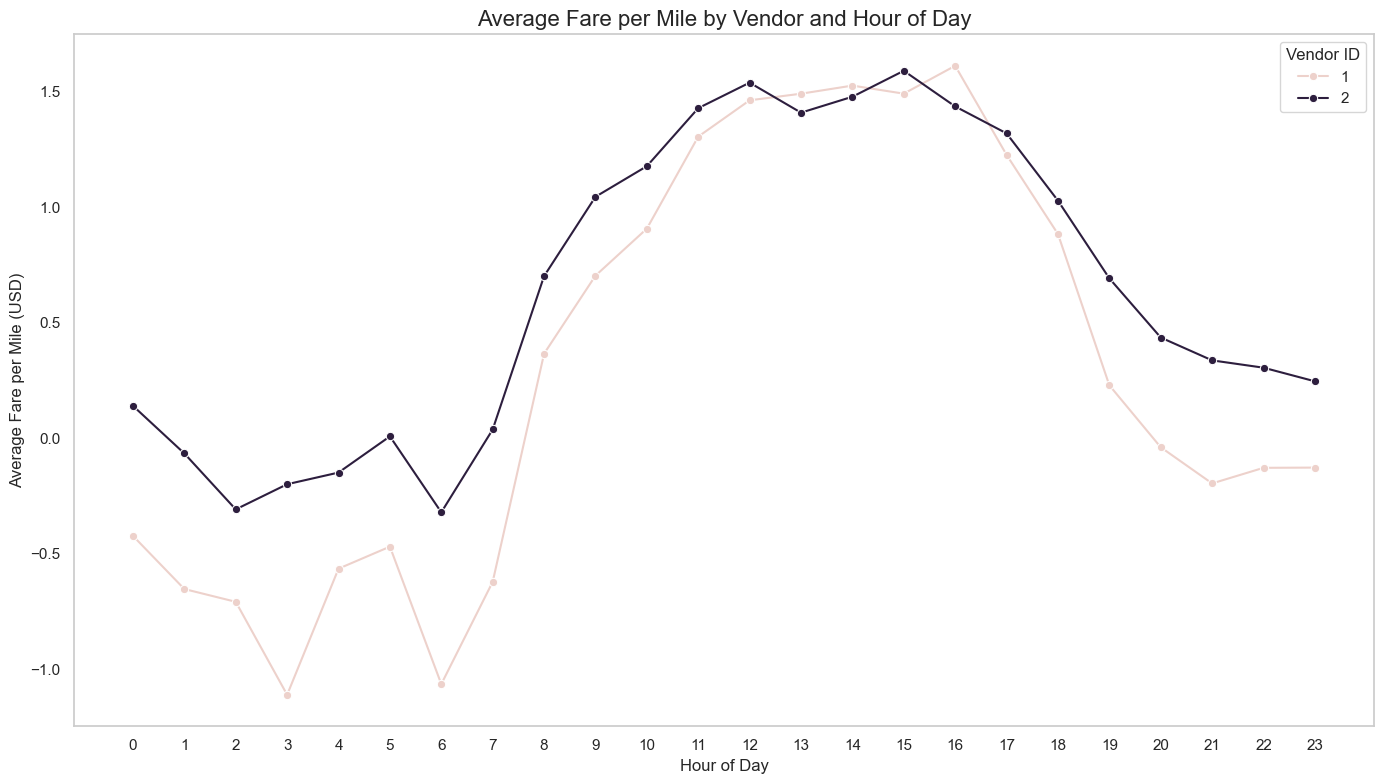

In [78]:
# Compare fare per mile for different vendors

# Group by VendorID & hour & calculate the average fare per mile
avg_fare_per_mile_vendor_hour = df_geo.groupby(['VendorID', 'hour'])['fare_per_mile'].mean().reset_index()

plt.figure(figsize=(14, 8))

sns.lineplot(data=avg_fare_per_mile_vendor_hour, x='hour', y='fare_per_mile', hue='VendorID', marker='o')

plt.title('Average Fare per Mile by Vendor and Hour of Day', fontsize=16)
plt.xlabel('Hour of Day')
plt.ylabel('Average Fare per Mile (USD)')
plt.xticks(range(0, 24))
plt.legend(title='Vendor ID')
plt.grid(False)
plt.tight_layout()
plt.show()


**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [79]:
# Defining distance tiers

conditions = [
    (df_geo['trip_distance'] <= 2),
    (df_geo['trip_distance'] > 2) & (df_geo['trip_distance'] <= 5),
    (df_geo['trip_distance'] > 5)
]

# Defining corresponding distance tier labels
distance_tiers = ['Up to 2 miles', '2 to 5 miles', 'More than 5 miles']

# Creating a new column 'distance_tier' based on the conditions
df_geo['distance_tier'] = np.select(conditions, distance_tiers, default='Other')

tiered_fare = df_geo.groupby(['VendorID', 'distance_tier'])['fare_per_mile'].mean().reset_index()

print(tiered_fare)

   VendorID      distance_tier  fare_per_mile
0         1       2 to 5 miles       0.682840
1         1  More than 5 miles       0.656553
2         1      Up to 2 miles       0.620869
3         2       2 to 5 miles       0.698610
4         2  More than 5 miles       0.657379
5         2      Up to 2 miles       0.935280


##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [80]:
#  Analyze tip percentages based on distances, passenger counts and pickup times

# Tip Percentage calculation
df_geo['tip_percentage'] = (df_geo['tip_amount'] / df_geo['fare_amount']) * 100

# Defining trip distance categories for analysis (e.g., up to 2 miles, 2-5 miles, 5+ miles)
conditions = [
    (df_geo['trip_distance'] <= 2),
    (df_geo['trip_distance'] > 2) & (df_geo['trip_distance'] <= 5),
    (df_geo['trip_distance'] > 5)
]

# Defining corresponding distance category labels
distance_categories = ['Up to 2 miles', '2 to 5 miles', 'More than 5 miles']

# Create a new column 'distance_category'
df_geo['distance_category'] = np.select(conditions, distance_categories, default='Other')

df_geo['pickup_hour'] = df_geo['tpep_pickup_datetime'].dt.hour

# Group by distance categories & calculate the average tip percentage
avg_tip_percentage_by_distance = df_geo.groupby('distance_category')['tip_percentage'].mean().reset_index()

# Group by passenger count & calculate the average tip percentage
avg_tip_percentage_by_passenger_count = df_geo.groupby('passenger_count')['tip_percentage'].mean().reset_index()

# Group by pickup hour & calculate the average tip percentage
avg_tip_percentage_by_hour = df_geo.groupby('pickup_hour')['tip_percentage'].mean().reset_index()


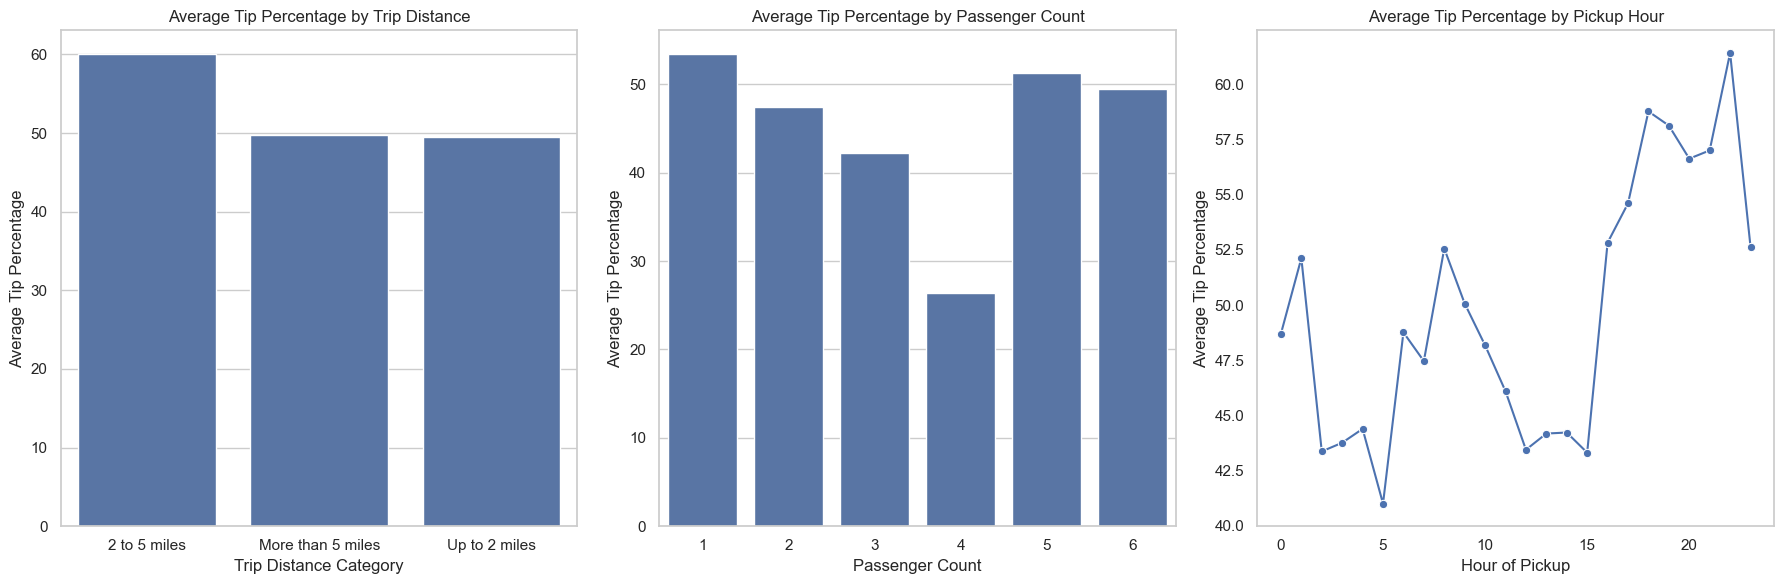

In [81]:
# Plotting the results

# Create subplots for distance, passenger count, and hour
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Distance Category vs Tip Percentage
sns.barplot(data=avg_tip_percentage_by_distance, x='distance_category', y='tip_percentage', ax=axes[0])
axes[0].set_title('Average Tip Percentage by Trip Distance')
axes[0].set_xlabel('Trip Distance Category')
axes[0].set_ylabel('Average Tip Percentage')
plt.grid(False)

# Passenger Count vs Tip Percentage
sns.barplot(data=avg_tip_percentage_by_passenger_count, x='passenger_count', y='tip_percentage', ax=axes[1])
axes[1].set_title('Average Tip Percentage by Passenger Count')
axes[1].set_xlabel('Passenger Count')
axes[1].set_ylabel('Average Tip Percentage')
plt.grid(False)

# Hour of Day vs Tip Percentage
sns.lineplot(data=avg_tip_percentage_by_hour, x='pickup_hour', y='tip_percentage', ax=axes[2], marker='o')
axes[2].set_title('Average Tip Percentage by Pickup Hour')
axes[2].set_xlabel('Hour of Pickup')
axes[2].set_ylabel('Average Tip Percentage')
plt.grid(False)

plt.grid(False)
plt.tight_layout()
plt.show()

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [82]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%

low_tip_trips = df_geo[df_geo['tip_percentage'] < 10]
high_tip_trips = df_geo[df_geo['tip_percentage'] > 25]

# Analyze differences in trip distance, passenger count, and fare amount
low_tip_summary = low_tip_trips[['trip_distance', 'passenger_count', 'fare_amount', 'tip_percentage']]
high_tip_summary = high_tip_trips[['trip_distance', 'passenger_count', 'fare_amount', 'tip_percentage']]

# Get average values for each group
low_tip_avg = low_tip_summary.mean()
high_tip_avg = high_tip_summary.mean()

# Print the averages for both low and high tip groups
print("Low Tip (tip percentage < 10%) - Averages:")
print(low_tip_avg)

print("\nHigh Tip (tip percentage > 25%) - Averages:")
print(high_tip_avg)

Low Tip (tip percentage < 10%) - Averages:
trip_distance        1.571932
passenger_count      1.431223
fare_amount          1.104543
tip_percentage    -183.430855
dtype: float64

High Tip (tip percentage > 25%) - Averages:
trip_distance        1.950844
passenger_count      1.395970
fare_amount          1.378568
tip_percentage     180.770763
dtype: float64


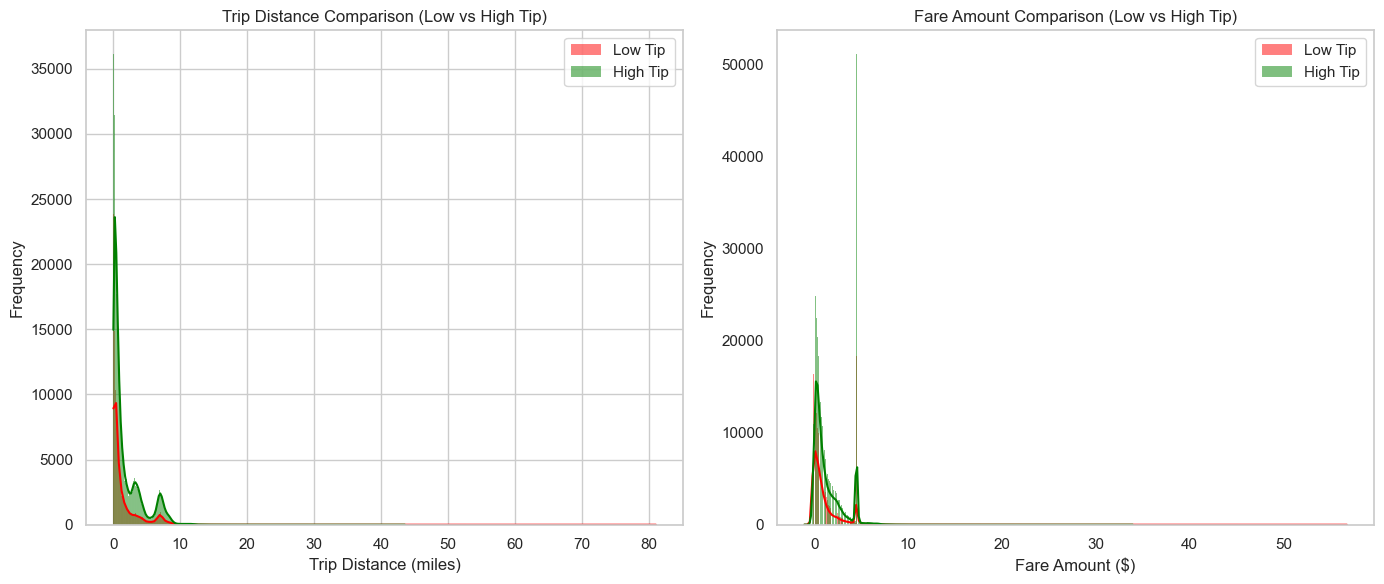

In [83]:
# Create subplots to compare low tips and high tips
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Low Tip Trip Distance, Passenger Count, and Fare Amount
sns.histplot(low_tip_trips['trip_distance'], kde=True, ax=axes[0], color='red', label='Low Tip')
sns.histplot(high_tip_trips['trip_distance'], kde=True, ax=axes[0], color='green', label='High Tip')
axes[0].set_title('Trip Distance Comparison (Low vs High Tip)')
axes[0].set_xlabel('Trip Distance (miles)')
axes[0].set_ylabel('Frequency')
axes[0].legend()
plt.grid(False)

# High Tip Trip Distance, Passenger Count, and Fare Amount
sns.histplot(low_tip_trips['fare_amount'], kde=True, ax=axes[1], color='red', label='Low Tip')
sns.histplot(high_tip_trips['fare_amount'], kde=True, ax=axes[1], color='green', label='High Tip')
axes[1].set_title('Fare Amount Comparison (Low vs High Tip)')
axes[1].set_xlabel('Fare Amount ($)')
axes[1].set_ylabel('Frequency')
axes[1].legend()
plt.grid(False)

plt.tight_layout()
plt.show()

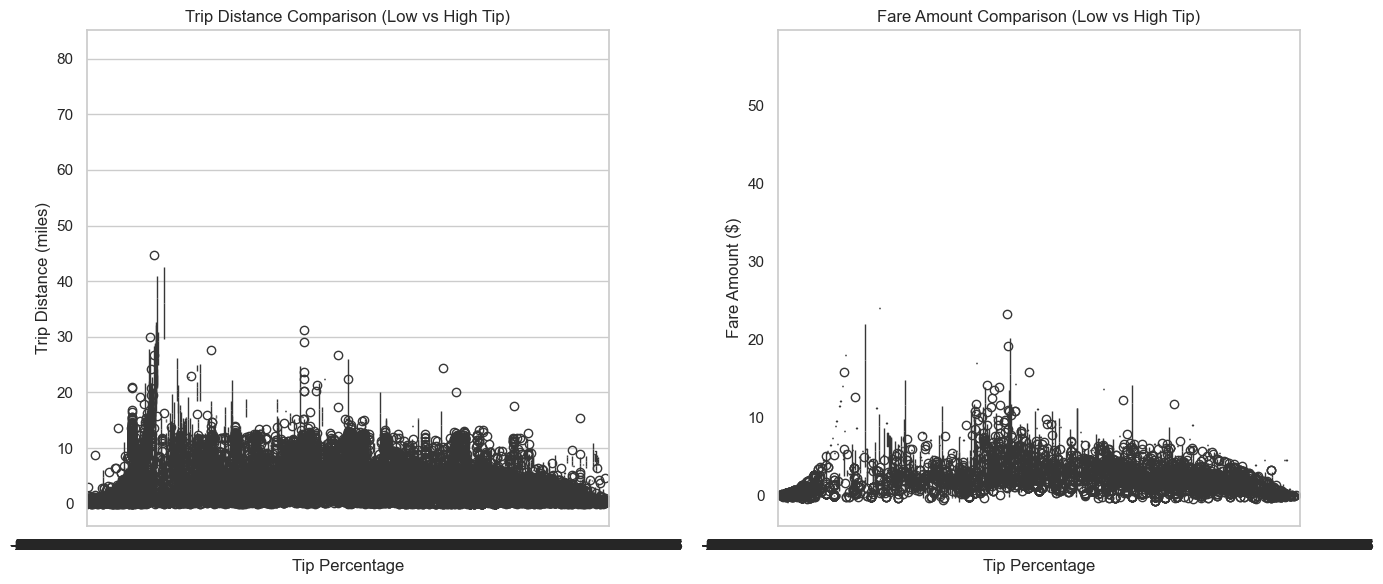

In [84]:
# Creating figure with subplots for trip distance & fare amount comparisons
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot for Trip Distance
sns.boxplot(x='tip_percentage', y='trip_distance', data=df_geo[df_geo['tip_percentage'].notna()], ax=axes[0], palette='coolwarm')
axes[0].set_title('Trip Distance Comparison (Low vs High Tip)')
axes[0].set_xlabel('Tip Percentage')
axes[0].set_ylabel('Trip Distance (miles)')
plt.grid(False)

# Boxplot for Fare Amount
sns.boxplot(x='tip_percentage', y='fare_amount', data=df_geo[df_geo['tip_percentage'].notna()], ax=axes[1], palette='coolwarm')
axes[1].set_title('Fare Amount Comparison (Low vs High Tip)')
axes[1].set_xlabel('Tip Percentage')
axes[1].set_ylabel('Fare Amount ($)')
plt.grid(False)

plt.tight_layout()
plt.show()

**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,...,trip_duration_min,trip_duration_hrs,pickup_hour,day_type,fare_per_mile,fare_per_mile_per_passenger,distance_tier,tip_percentage,distance_category,pickup_dayofweek
0,2,2023-01-01 00:07:18,2023-01-01 00:23:15,1,2.602620,1,138,256,2,1.500000,...,15.950000,0.265833,0,Weekend,0.576342,0.576342,2 to 5 miles,-54.947166,2 to 5 miles,Sunday
4,1,2023-01-01 00:42:56,2023-01-01 01:16:33,2,2.323144,1,246,37,1,1.666667,...,33.616667,0.560278,0,Weekend,0.717419,0.358709,2 to 5 miles,87.146974,2 to 5 miles,Sunday
6,2,2023-01-01 00:16:06,2023-01-01 00:31:59,1,0.602620,1,79,256,1,0.444444,...,15.883333,0.264722,0,Weekend,0.737520,0.737520,Up to 2 miles,204.899135,Up to 2 miles,Sunday
7,2,2023-01-01 00:44:09,2023-01-01 01:01:17,1,2.558952,1,132,95,1,1.444444,...,17.133333,0.285556,0,Weekend,0.564467,0.564467,2 to 5 miles,84.393704,2 to 5 miles,Sunday
10,2,2023-01-01 00:24:48,2023-01-01 00:45:04,1,0.436681,1,79,186,1,0.500000,...,20.266667,0.337778,0,Weekend,1.145000,1.145000,Up to 2 miles,121.037464,Up to 2 miles,Sunday


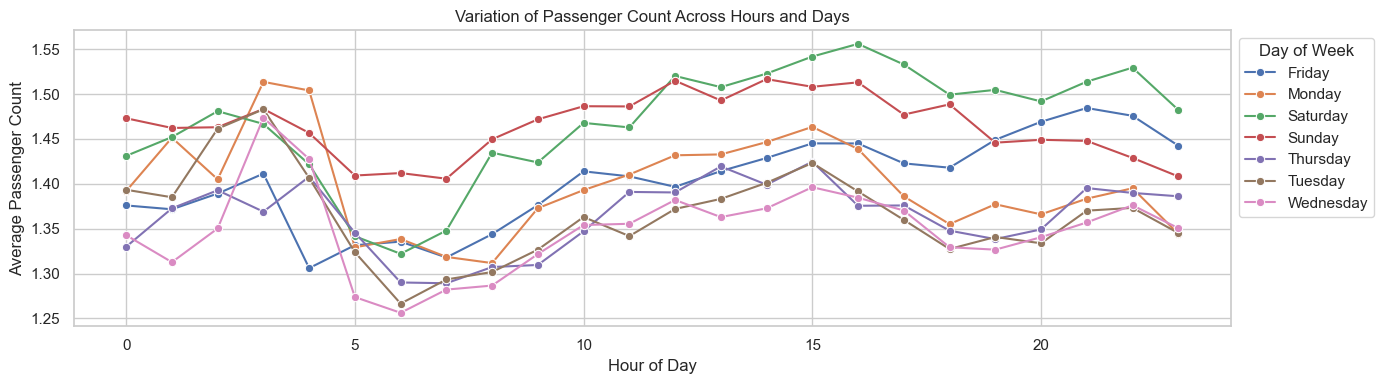

In [85]:
# See how passenger count varies across hours and days

df_geo['pickup_dayofweek'] = df_geo['tpep_pickup_datetime'].dt.day_name()

# Average passenger count by hour and day
passenger_trend = df_geo.groupby(['pickup_dayofweek', 'pickup_hour'])['passenger_count'].mean().reset_index()

plt.figure(figsize=(14, 4))
sns.lineplot(data=passenger_trend, x='pickup_hour', y='passenger_count', hue='pickup_dayofweek', marker='o')
plt.title('Variation of Passenger Count Across Hours and Days')
plt.xlabel('Hour of Day')
plt.ylabel('Average Passenger Count')
plt.legend(title='Day of Week', bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show

df_geo.head()


**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [86]:
# How does passenger count vary across zones

# Group by PULocationID, calculating average passenger count, and map zone names
pickup_passenger_counts = (
    df.groupby('PULocationID')['passenger_count']
    .mean()
    .reset_index()
    .rename(columns={'PULocationID': 'LocationID', 'passenger_count': 'avg_passenger_count'})
)

# checking unique LocationID in zones before merge
zones_unique = zones.drop_duplicates(subset='LocationID')

# Merge zone names
pickup_passenger_counts = pickup_passenger_counts.merge(zones_unique[['LocationID', 'zone']], on='LocationID', how='left')



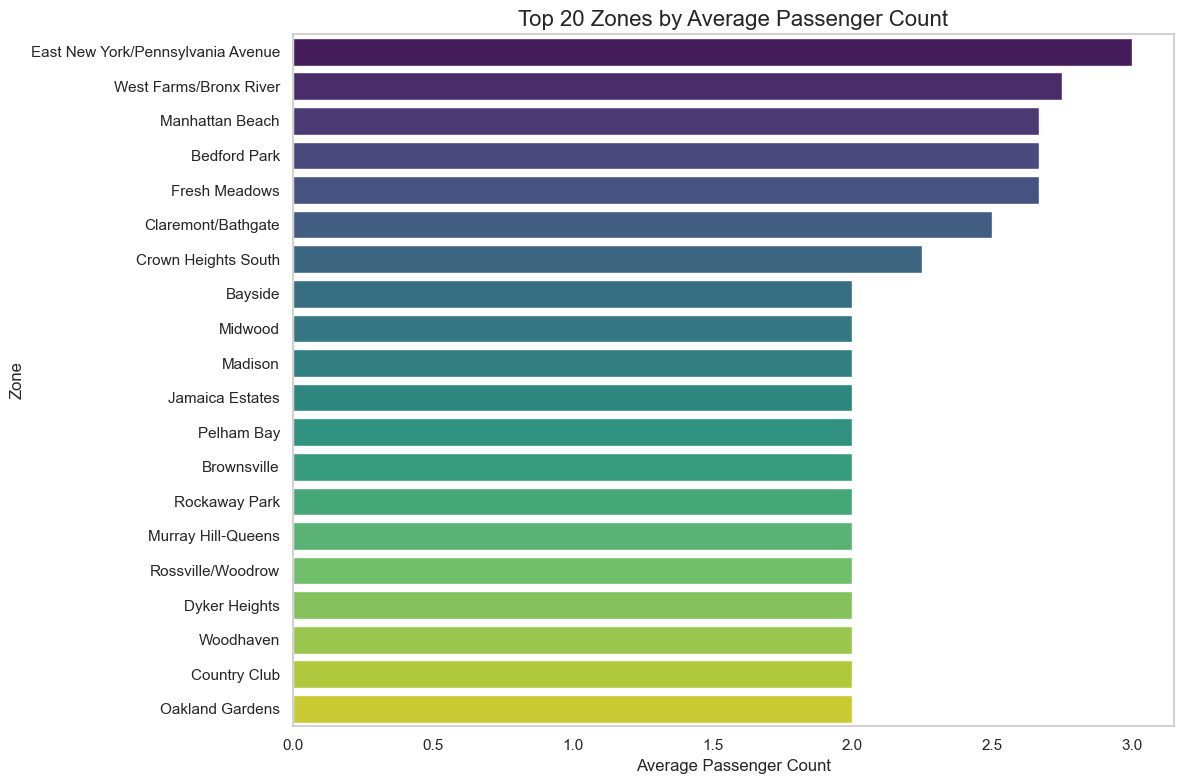

In [87]:
# Sort zones by average passenger count
top_zones_passenger = pickup_passenger_counts.sort_values(by='avg_passenger_count', ascending=False).head(20)

plt.figure(figsize=(12, 8))
sns.barplot(data=top_zones_passenger, x='avg_passenger_count', y='zone', palette='viridis')

plt.title('Top 20 Zones by Average Passenger Count', fontsize=16)
plt.xlabel('Average Passenger Count')
plt.ylabel('Zone')
plt.grid(False)
plt.tight_layout()
plt.show()

In [88]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.

# Group by PULocationID for calculating average passenger count
avg_passenger_by_zone = df.groupby('PULocationID')['passenger_count'].mean().reset_index()
avg_passenger_by_zone.rename(columns={'passenger_count': 'avg_passenger_count'}, inplace=True)


# Merging zones with average passenger count
zones_with_trips = zones.merge(avg_passenger_by_zone, left_on='LocationID', right_on='PULocationID', how='left')

# Filling missing values with 0 (for zones that had no trips)
zones_with_trips['avg_passenger_count'] = zones_with_trips['avg_passenger_count'].fillna(0)

zones_with_trips[['zone', 'borough', 'avg_passenger_count']].sort_values(
    by='avg_passenger_count', ascending=False).head(10)


,zone,borough,avg_passenger_count
76,East New York/Pennsylvania Avenue,Brooklyn,3.000000
247,West Farms/Bronx River,Bronx,2.750000
17,Bedford Park,Bronx,2.666667
149,Manhattan Beach,Brooklyn,2.666667
97,Fresh Meadows,Queens,2.666667
46,Claremont/Bathgate,Bronx,2.500000
61,Crown Heights South,Brooklyn,2.250000
34,Brownsville,Brooklyn,2.000000
66,Dyker Heights,Brooklyn,2.000000
174,Oakland Gardens,Queens,2.000000


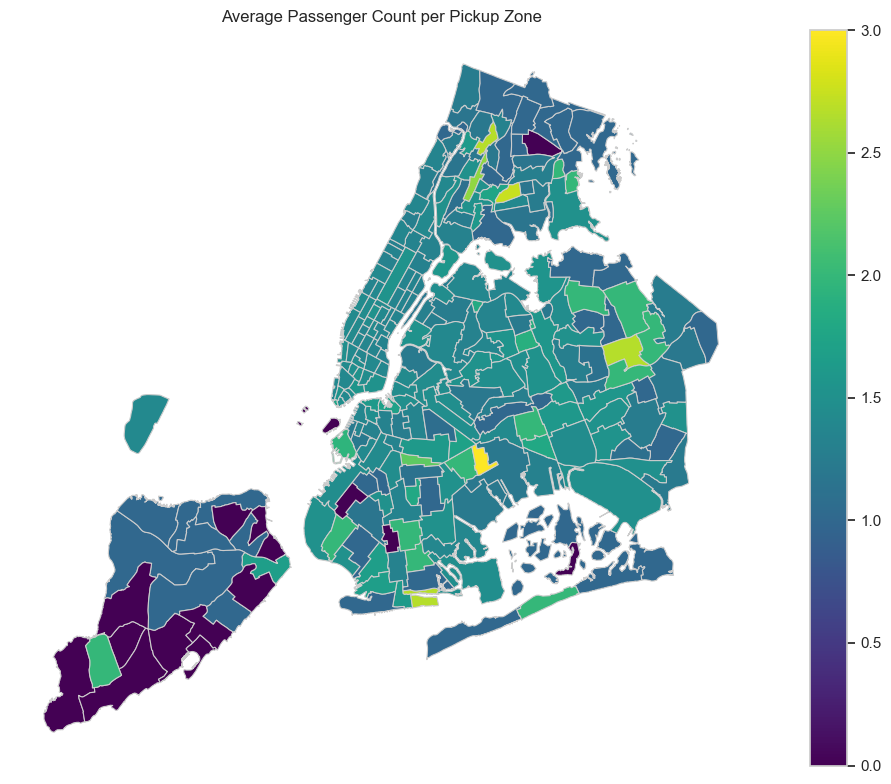

In [89]:
# Plot the average passenger count per zone

fig, ax = plt.subplots(figsize=(12, 8))
zones_with_trips.plot(column='avg_passenger_count',
                      cmap='viridis',
                      linewidth=0.8,
                      edgecolor='0.8',
                      legend=True,
                      ax=ax)

plt.title('Average Passenger Count per Pickup Zone')
plt.axis('off')
plt.grid(False)
plt.tight_layout()
plt.show()


Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [90]:
# How often is each surcharge applied?

# 1. Frequency of surcharges applied (percentage of trips with non-zero values)
surcharge_stats = {
    'extra': (df['extra'] > 0).mean(),
    'congestion_surcharge': (df['congestion_surcharge'] > 0).mean(),
    'airport_fee': (df['airport_fee'] > 0).mean()
}
surcharge_freq_df = pd.DataFrame.from_dict(surcharge_stats, orient='index', columns=['Applied_Frequency'])
surcharge_freq_df['Applied_Frequency'] *= 100  # Convert to percentage

# 2. Time-based: Group by hour of day
time_surcharge = df.groupby('hour')[['extra', 'congestion_surcharge', 'airport_fee']].mean().reset_index()

# 3. Zone-based: Group by pickup zone and calculate average surcharges
zone_surcharge = df.groupby('PULocationID')[['extra', 'congestion_surcharge', 'airport_fee']].mean().reset_index()
zone_surcharge = zone_surcharge.merge(zones[['LocationID', 'zone']], left_on='PULocationID', right_on='LocationID', how='left')



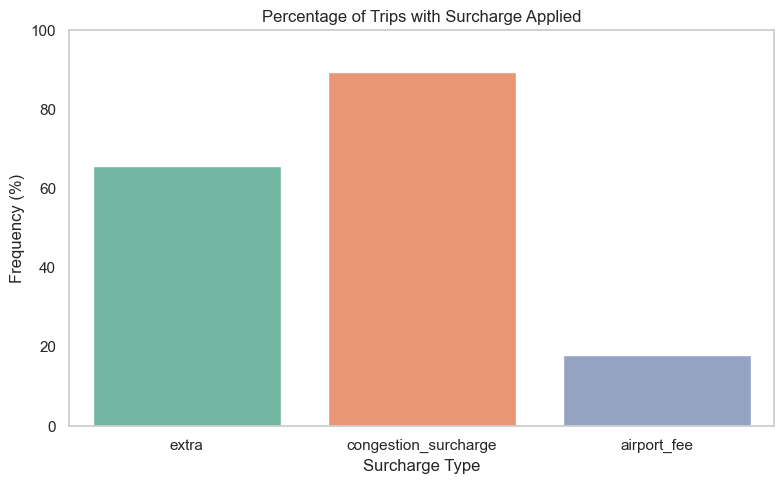

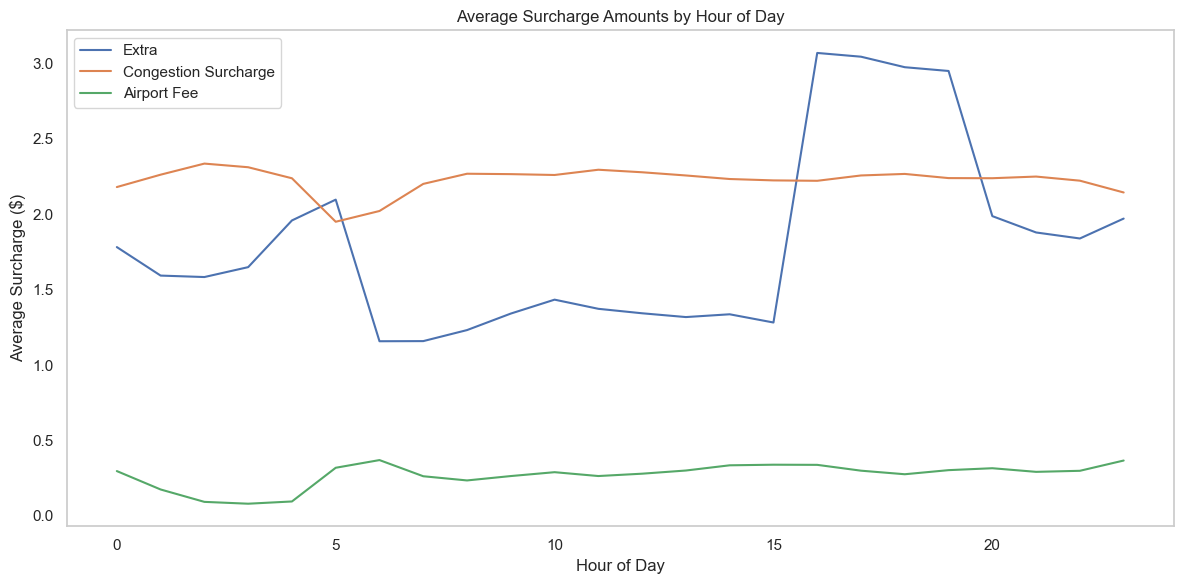

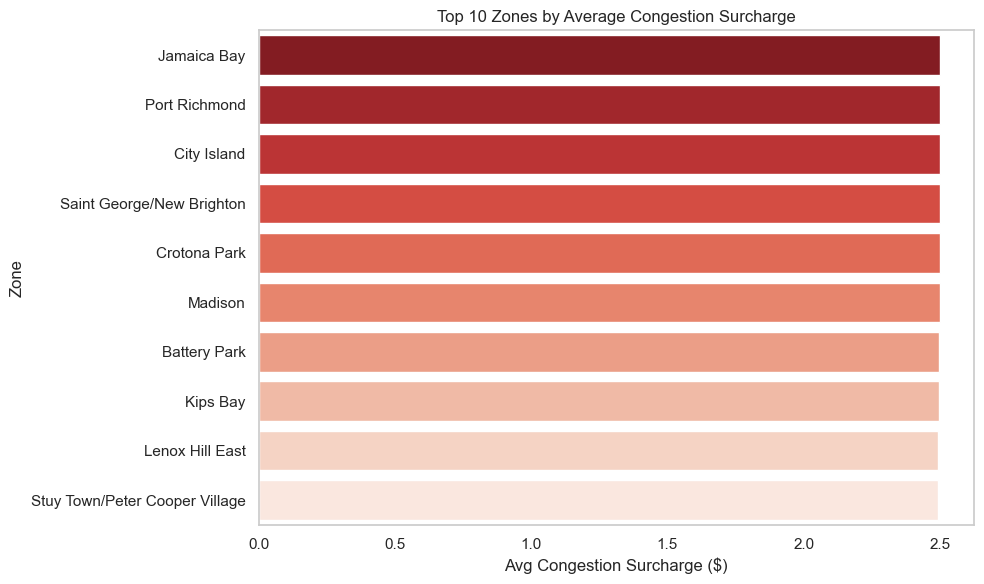

In [91]:
# 1. Bar chart for how often surcharges are applied
plt.figure(figsize=(8, 5))
sns.barplot(x=surcharge_freq_df.index, y='Applied_Frequency', data=surcharge_freq_df, palette='Set2')
plt.title('Percentage of Trips with Surcharge Applied')
plt.ylabel('Frequency (%)')
plt.xlabel('Surcharge Type')
plt.ylim(0, 100)
plt.grid(False)
plt.tight_layout()
plt.show()

# 2. Line chart of surcharge amounts by hour
plt.figure(figsize=(12, 6))
sns.lineplot(data=time_surcharge, x='hour', y='extra', label='Extra')
sns.lineplot(data=time_surcharge, x='hour', y='congestion_surcharge', label='Congestion Surcharge')
sns.lineplot(data=time_surcharge, x='hour', y='airport_fee', label='Airport Fee')
plt.title('Average Surcharge Amounts by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Surcharge ($)')
plt.grid(False)
plt.legend()
plt.tight_layout()
plt.show()

# 3. Optional: Top 10 zones by average congestion surcharge
top_zones = zone_surcharge.sort_values('congestion_surcharge', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_zones, x='congestion_surcharge', y='zone', palette='Reds_r')
plt.title('Top 10 Zones by Average Congestion Surcharge')
plt.xlabel('Avg Congestion Surcharge ($)')
plt.ylabel('Zone')
plt.grid(False)
plt.tight_layout()
plt.show()

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

Ans : ->

Smart Scheduling -> Put more taxis on the road during busy times: weekday mornings (7-10AM), evenings (4-8PM), and weekend nights Reduce taxis during slow periods to save money

Better Route Planning -> Use traffic updates to help drivers avoid busy areas like Times Square Position drivers where rides will be needed before demand increases

Strategic Coverage -> Focus on busy pickup spots like Midtown and airports Add more taxis in growing areas like Brooklyn during evenings

Data Cleanup -> Create better checks for unusual fares and trip distances Look closely at areas with strange patterns to fix problems

Tailored Services -> Offer shared rides during office hours when many people travel similar routes Provide premium options for late-night downtown customers

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

Ans ->

Taxi Positioning Strategy Made Simple Best Places for Taxis

Midtown Manhattan

When: Weekday mornings (7-10AM) and evenings (4-8PM), especially Tuesday-Thursday Why: Office workers, tourists, regular commuters Do: Have extra taxis ready during office rush hours

Airports (JFK, LGA)

When: Every day, especially 5-11PM on weekends and holidays Why: Travelers with luggage need taxis Do: Match taxi availability with flight arrivals

Downtown and Financial District

When: Weekday mornings (7-9AM) and evenings (5-7PM) Why: Business people taking short to medium trips Do: Focus on start and end of business hours

Brooklyn and Queens

When: Evenings and weekends Why: People going home or out for fun Do: Move taxis from Manhattan to these areas at night and on weekends

Outer Boroughs (Bronx, Staten Island)

When: Early mornings and weekends Why: Fewer transportation options Do: Offer special booking options during quieter times

Time Tips

Weekdays: Focus on business areas and commuter routes Weekends: Cover entertainment spots, airports, and neighborhoods

Seasonal Changes -> Add more taxis in tourist areas from May-September and during holiday shopping seasons

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

Ans ->

Simple Pricing Strategy

Match Prices to Different Customer Types
Work Travelers: These people care more about being on time than saving a few dollars. Offer reliable service during weekday commute hours. Weekend Fun-Seekers: These customers watch their spending more closely. Give them group discount options. Tourists: These riders want simple pricing and safe service from airports and landmarks. Offer clear flat rates.

Reward Regular Riders
Offer monthly ride passes for frequent customers Give discounts or cashback to people who use the service often

Smarter Price Adjustments
Use traffic, weather, and other data to spot when rides will be difficult Add small price increases ($1-3) only when necessary, not just because it's busy

Simple Flat Rates Between Popular Places
Set fixed prices for common routes like airport trips Customers prefer knowing the exact fare before riding

Stay Competitive Without Losing Money
Keep track of what Uber, Lyft and others are charging Price just below competitors when possible, but not so low that you lose money

This approach keeps prices fair while still making profit, keeps customers coming back, and stays competitive without relying on surprise price increases.

